# Project 2: Predicting Ontime Performance for Mystery Airline

#### Dennis Murray and Alex Deshowitz
#### MSDS 7331
#### March 12, 2017

# Project Overview and Objectives

This project seeks to classify 2 main objectives:
  * **Ontime performance** - as defined by the DOT (see data dictionary for definition)
  
  * **D0** -  Whether a flight departs ontime
    
This task is a hard problem to solve.  We recognize that our dataset may not have all of the correct attributes to correctly and appropriately predict all scenarios.  In the real world, we would be able to iterate and add to our dataset.  However, for the sake of timliness and actually finishing this project and initial analysis, we will simply work with the attributes that we are given.  That being said, our objective is to best predict both D0 and ontime performance with the information that we have available.  Our hope is to leverage this information in order to add to and build better models in the future.

##### Modeling and Evaluation metrics

To evaluate the models that we attempted, we had to think about the ramifications of getting the answers incorrect.  We also had to consider that since we are trying to predict something that only happens 20% of the time (late flights) accuracy may not be the best choice for evaluation.  We may see levels that look unnecessarily good.  From the standpoint of the organization, false positives could be a huge problem.  The reasoning for this is because airlines plan schedules for crew, ground operations, gate operations, customer service operations both by the number of flights that are expected and the overall ontime percentage that is expected.  If a station expects that a higher than normal number of flights will be ontime, they will generally choose to use fewer staff members to work the flights, because the workload is theoretically lighter.  Additionally, if the operation is expected to perform rather poorly, the stations may choose to add an extra head or two to the schedule.  While it sounds as though adding additional people to the schedule could be expensive, the alternative under an unexpectedly poor performance scenario is that an entire shift of individuals could windup extending their workday at 2-3 times their normal pay rate.  The cost is essentially exponential.  Therefore we will be using both **accuracy** and **precision** to make our modeling decisions and recommendations.  However, we will also provide recall and F1.  

##### Cross Validation Methodology

For this model, we chose to use a 10-fold stratified cross validation.  There were several reasons for taking this approach.  First, this approach is generally a better scheme when thinking about bias and variance versus regular "holdout" cross-validation.  Additionally, for this modeling exercise, the class that we are modeling for OTP has an 80/20 distribution as in flights are generally ontime about 80% of the time.  Therefore, we wanted to hold the distribution of the classes constant in our modeling.  Stratified cross-validation allows us to keep the distribution of the classes the same within each fold of the data.  Therefore this is a really good approach given the classification variables at hand.

##### Other Notes

It might be noticed that some of the code for different models in this report is repeated.  This is not a naive approach to modeling.  This approach ensures that code blocks are not dependent upon previous code blocks that took an egregious about of time to render.



<a id="top"></a>

# Table of Contents

* Since we realize that this document is large and hard to navigate, we are adding in a table of contents to allwo for easy navigation.  This also incorporates some feedback from our previous project

* FINISH BUILD OUT

### Contents

* <a href="#Dictionary"> Data Dictionary</a>
* <a href="#Packages"> Main Package Imports</a>
* <a href="#Cleaning"> Data Cleaning </a>
* <a href="#Selection"> Attribute Selection </a>
* <a href="#Task1"> **Classification Task 1- DOT Ontime Performance** </a>
    * <a href="#T1Log1"> Logistic Regression- 1 </a> 
    * <a href="#T1Log2"> Logistic Regression- 2 </a>
    * <a href="#T1KNN1"> K-Nearest Neighbors </a> 
    * <a href="#T1DT"> Decision Tree </a> 
    * <a href="#T1NaiveBayes"> Naive Bayes </a> 
    * <a href="#T1Forest"> Random Forest </a> 
    * <a href="#T1Boost"> AdaBoost </a> 
    * <a href="#T1Comps"> **Task 1 Model Comparisons** </a>
    * <a href="#T1Summary"> **Task 1 Summary** </a>
    
* <a href="#Task2"> **Classification Task 2- D0 Performance** </a>
    * <a href="#T2Log"> Logistic Regression- 1 </a>
    * <a href="#T2KNN"> K-Nearest Neighbors </a> 
    * <a href="#T2DT"> Decision Tree </a> 
    * <a href="#T2NB"> Naive Bayes </a> 
    * <a href="#T2Forest"> Random Forest </a> 
    * <a href="#T2Boost"> AdaBoost </a> 
    * <a href="#T2comp"> **Task 2 Model Comparisons** </a>
    * <a href="#T2Summary"> **Task 2 Summary** </a>
* <a href="#FurtherResearch"> **Further Research Areas** </a>

 
    
     
    




<a id="Dictionary"></a>
<a href="#top">Back to Top</a>

## Data Dictionary

#### Overview
This dataset contains one month of flight(leg) level information for an airline.  This dataset was created with the intent to forecast ontime performance for an airline.  Ontime performance as defined by the US department of transportation as any flight arriving within 15 minutes of its scheduled arrival time in the destination city

* **Origin** - The DOT airport code denoting the starting point of a flight leg (see link for list of codes:####)
* **Destination** - The DOT airport code denoting the ending point of a flight leg.  This list contains the same values as the origin field as an origin can be a destination and a destination can be an origin.  All airlines serve markets in this fashion.  For example, if Delta Airlines serves ATL-MSY (Dallas-New Orleans), they also serve the market in the opposite direction: MSY-ATL. 
* **Market** - A market is any origin and destination pair.  For example: ATL-TPA is a market.  Airlines always serve markets in a balanced fashion.  This means that if the airline serves ATL-MSY 11 times a day, the airline also serves the MSY-ATL 11 times a day.  The airline can still arbitrage the capacity in directions which have imbalanced demand patterns via changes in aircraft size (gauge).  For instance, Delta may serve MSY-ATL with 11 regional jets and ATL-MSY with 11 Boeing 757s (considerably larger aircraft). However, most airlines use far more sophisticated methods.  Markets tend to have time of day seat (gauge) patterns that attempt to best match demand patterns.  This means that we expect to see markets with mixed gauge patterns throughout the day.
* **Origin Latitude** - The latitude of the origin airport
* **Origin Longitude** - The longitude of the origin airport
* **Destination Latitude** - The latitude of the Destination airport
* **Destination Longitude** - The longitude of the Destination airport
* **Origin Country** - The country of origin for the flight leg.  Note that SJU (San Juan) is not included as international in this dataset per DOT specification.
* **Origin Country** - The destination country for the flight leg.  Note that SJU (San Juan) is not included as international in this dataset per DOT specification.
* **Flight Number** - Distinct number denoting a specific flight on a specific day.  While flight numbers can repeat on a day level, they cannot repeat at the same airport within 6 hours for obvious issues associated with the potential to have multiple flights in air with the same number at the same time from the same airline.  The number for scheduled flights ranges from 1-6999.  However, mistakes do happen, so it is best not to hard code filter any of these numbers.
* **Miles Flown** - Great circle mileage calculation for miles flown.  Note that this does not vary by market as this is simply the scheduled mileage and does not take into account flight path diversions.
* **Departure Date** - The date of departure between 5/1/2016 and 5/31/2016
* **Day of Week** - The day of week that a flight departs with 1 being equivalent to Monday
* **Flight Type Code** - One of 3 values indicating the flight type for DOT purposes.  This dataset was prefiltered to include only those types considered by the DOT for Ontime departures.
    * **Blank Value**- Records that have no value for the flight type code were scheduled flights that flew as scheduled
    * **Code S**- Records with flight type code S represent stub originator flights.  Stub originators are flights that were not scheduled to be originators on the flight line, but had an aircraft swap that made the route appear to have multiple orginator flights.  An originator is an aircraft's first flight of the day.  On average, aircraft in this dataset fly 6 flight legs per day.  A flight line could have both an originator and a stub originator with the given scenario.  Flight 1 on flight line number 150 from DAL-HOU departed HOU at 6am, and arrived in DAL at 7am.  The aircraft on flight route 150 was scheduled to continue on from HOU to ATL at 9am.  However, another flight line, say line 200, that was supposed to begin its day flying HOU-MCO at 8am had an aircraft go down for maintenance.  This line now has no aircraft to fly.  The dispatchers may decide that the aircraft on line 150 can take over line 200 and the aircraft on line 200 can take over line 150 because it leaves later and the maintenance issue can be fixed in time for the 9am HOU-ATL flight.  The flight that takes over line 150 is now considered a stub originator, flight type code 's.'  
    * **Code X**- Flight type code X denotes a flight that was cancelled.  Due to the sparse nature of the attributes in this dataset, we will calculate OTP with 
* **Flight Route Number**: The route number denotes an aircraft's line of flying for the day.  These will repeat for a given aircraft for a day for all flights in the flight line.
* **Route Sequence Number**: A number between 1 and 10 that denotes the aircraft's leg number on the flight line.
* **Aircraft Type Code** : The type of aircraft flying the flight.  All aircraft in this dataset are Boeing 737 variants
    *  WIll come back and fill these in later.  May need to change in the dataset.
* **Flight Cancellation code**: Code denoting the cancellation reason if the flight is cancelled.  Unlikely to use this for predictive purposes.
* **Alternate Airport**: If a flight has to divert for any reason to a different airport, this field will show the airport code where the aircraft landed
* **Push Delay Mins**: The number of minutes after the scheduled departure time that the aircraft pushed from the gate.  This is not used by the DOT.
* **Delay Type**: When a flight takes any type of departure delay, the departure station codes a reason for the delay.  The most common codes are : HD- some sort of hold, OP - operational, WX - weather, IF - inflight
* **Aircraft Tow Weight**: The weight of the aircraft prior to departure
* **Aicraft Landing Weight**: The standard landing weight of the aircraft.  This landing weight is aircraft specific and used for calculating landing fees at the destination airport.
* **Fuel Loaded**: Weight of the fuel loaded in thousands of pounds
* **Central Scheduled Departure Time**: Scheduled departure time of the aircraft in Central time.  
* **Local Scheduled Departure Time**: Scheduled departure time of the aircraft in Local time.  
* **Central Scheduled Arrival Time**: Scheduled arrival time of the aircraft in Central time. 
* **Local Scheduled Arrival Time**: Scheduled arrival time of the aircraft in Local time. 
* **Total Passengers**: Total number of people onboard the aircraft
* **Local Passengers**: The number of passengers traveling nonstop on the flight.  These people are not and will not be making a connection.
* **Connect Passengers**: The number of passengers making a connection at some point in their itinerary.
* **Thru Passengers**: The number of passengers onboard the aircraft who had flown on a previous flight on that aircraft and rather than making a connection stay on the aircraft.
* **Unaccompanied Minors**: The count of minors of age 5-11 not traveling with someone else at least age 12 or greater.
* **Total Nonrev Passengers**: The number of passengers onboard not paying a fare.  The individuals could be employees travleing for work or leisure, companion passholders, guest pass users, etc.
* **DOT Security Delay Time**: The delay time accounted for by security backups
* **NAS Delay Minutes**: The number of delay minutes due to National Airspace issues.
* **Weather Delay Minutes**: Delay minutes attributed to weather issues
* **DOT Delay Minutes**: Difference between actual arrival time and the scheduled arrival time.
* **Flight attendant change Indicator**: Field indicating whether there was a crew change for the flight attendants on a flight
* **Total Bags** : The number of checked bags on the flight
* **Bag Weight**: The weight of the bags on the flight
* **Freight Weight Total**: The weight of the total freight onboard the aircraft
* **Scheduled Turn Minutes**: The scheduled amount of time in the origin city that the ground grew has to unload passengers and bags, load passengers and bags, refuel, restock, and prep the plane for the next departure.
* ** Itins In**: The total number of itineraries scheduled that could have inbound connections on the leg.  
* ** Itins Out**: The total number of itineraries that the flight connects to
* ** Total Itins on Leg**: The total number of possible itineraries on the flight leg.  This number is not necessarily the aggregation of itins in and itins out.  There are nuances that can cause this number to be slightly higher or lower since an itin in can also be an itin out.



<a id="Packages"></a>
<a href="#top">Back to Top</a>

# Main Package Imports

In [67]:
# import packages

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import sklearn as sk
import statsmodels.api as sm
#import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
from pandas.tools.plotting import scatter_plot
from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import scale, StandardScaler
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression, Lasso, Lars, SGDRegressor

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt


#import locale
#locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

from pandas.tools.plotting import scatter_matrix

from sklearn.svm import SVR
from sklearn.feature_selection import RFE, RFECV

from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline


#configure the random seed so we our randomness is reproducible for selection of learn/test sets
np.random.seed(0)

%matplotlib inline

In [68]:
#read in the data file
OnTime=pd.read_csv("Data/20170112_DataMiningI_TestDataSet_v01.csv", header=0)

In [69]:
# look at datatypes
OnTime.dtypes

origin                         object
origin_latitude               float64
origin_longitude              float64
destination                    object
destination_latitude          float64
destination_longitude         float64
origin_country                 object
destination_country            object
flight_number                   int64
miles_flown                     int64
departure_date                 object
day_of_week                     int64
flight_type_code               object
flight_route_number             int64
route_sequence_number           int64
aircraft_type_cde               int64
flight_cancellation_code       object
alternate_airport              object
push_delay_mins                 int64
delay_type                     object
delay_id                       object
aircraft_seat_count             int64
aircraft_tow_weight             int64
aircraft_landing_weight         int64
fuel_loaded                     int64
central_scheduled_dep_time      int64
local_schedu

In [70]:
OnTime['flight_type_code'].describe()

count     112059
unique         3
top             
freq      110711
Name: flight_type_code, dtype: object

<a id="Cleaning"></a>
<a href="#top">Back to Top</a>

# Data Cleaning

The first thing we want to get rid of in this dataset is cancelled flights.  While a cancelled flight is technically not considered ontime, the data in this set is too sparse to forecast cancellations. We would need additional attributes to be able to forecast cancellations

In [71]:
len(OnTime) - len(OnTime.loc[OnTime['flight_type_code']!= 'X'])

1004

looks like we are filtering out about 1004 records

In [72]:
OnTime = OnTime.loc[OnTime['flight_type_code']!= 'X']

In [73]:
OnTime['flight_type_code'].describe()

count     111055
unique         2
top             
freq      110711
Name: flight_type_code, dtype: object

Now we have a dataset that excludes those sparse records.

The route sequence number is loaded into the file as a multiple of one-hundred million.  We would like this to be a more readable format.  Additionally, it makes more notional sense given that this value is the sequence number in the line.  Therefore a number between 1 and 10 makes sense to display

In [74]:
# need to fix route sequence number

#print(OnTime['route_sequence_number'].unique(), (OnTime['route_sequence_number']/100000000).unique())

print((OnTime['route_sequence_number']/100000000).head())

0    3.0
1    2.0
2    7.0
3    3.0
4    6.0
Name: route_sequence_number, dtype: float64


In [75]:
OnTime['route_sequence_number'] = OnTime['route_sequence_number']/100000000

print(OnTime['route_sequence_number'].head(), OnTime['route_sequence_number'].unique())


0    3.0
1    2.0
2    7.0
3    3.0
4    6.0
Name: route_sequence_number, dtype: float64 [  3.   2.   7.   6.   1.   5.   4.   9.  10.   8.]


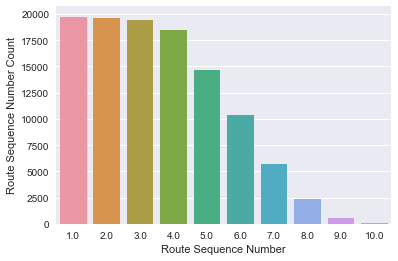

In [76]:
ax  = sns.countplot(OnTime['route_sequence_number'])
ax = plt.ylabel('Route Sequence Number Count')
ax = plt.xlabel('Route Sequence Number')
plt.show()

The countplots look good with the removal of the cancelled flights.  Previously, we had some route sequence numbers >10.  This is not possible, because the most legs a line can contain in this dataset is 10

In [77]:
#Create indicator for ontime performance, where 1 = OnTime and 0 = LATE
OnTime['OnTimeIndicator'] = np.where(OnTime['dot_delay_mins']>=15, 0, 1)


The DOT defines a flight as being on time if it arrives within 15 minutes of the scheduled arrival time.

We need to create time of day buckets.  Luckily there are predefined bins that we can use.

In [78]:
#Need some Time of Day buckets
OnTime['TimeBucket']=pd.cut(OnTime['local_scheduled_dep_time'],[0, 600, 700, 1200, 2000, 2200,2800],6, 
       labels=["deep_shoulder_am", "shoulder_am", "am_meat", "pm_meat", "shoulder_pm","deep_shoulder_pm"])

# test the variable

print(OnTime[['local_scheduled_dep_time','TimeBucket']].head())

   local_scheduled_dep_time   TimeBucket
0                      1205      pm_meat
1                       925      am_meat
2                      2200  shoulder_pm
3                      1105      am_meat
4                      1825      pm_meat


It looks like this variable is working well

In [79]:
#Need an "International" code
OnTime['International'] = np.where(OnTime['origin_country']!=OnTime['destination_country'], 1, 0)

In [80]:
print(OnTime[['origin_country','destination_country', 'International']].head(20))

              origin_country       destination_country  International
0   United States of America  United States of America              0
1   United States of America  United States of America              0
2   United States of America  United States of America              0
3   United States of America  United States of America              0
4   United States of America  United States of America              0
5   United States of America  United States of America              0
6   United States of America  United States of America              0
7   United States of America  United States of America              0
8   United States of America  United States of America              0
9   United States of America                Costa Rica              1
10  United States of America  United States of America              0
11  United States of America  United States of America              0
12  United States of America  United States of America              0
13  United States of

We also need to look at the FA change indicator.  It looked suspect in previous work.

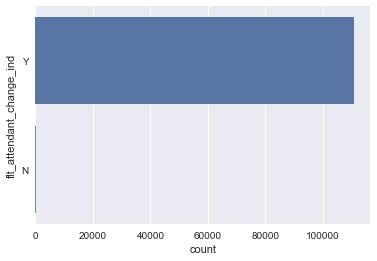

In [81]:
#OnTime['flt_att_chg'] = np.where(OnTime['flt_attendant_change_ind'] == 'Y', 1, 0)
#print(OnTime[['flt_att_chg','flt_attendant_change_ind']].tail(100))
ax = sns.countplot(y =  OnTime['flt_attendant_change_ind'])

plt.show()


In [82]:
# we need to drop FA change because it is nearly all Y, which isn't possible.
del OnTime['flt_attendant_change_ind']

In [83]:
# add an originator indicator

OnTime['Originator_ind'] = np.where(OnTime['route_sequence_number']== 1.0,1,0)

print(OnTime[['Originator_ind','route_sequence_number']].head(10))

   Originator_ind  route_sequence_number
0               0                    3.0
1               0                    2.0
2               0                    7.0
3               0                    3.0
4               0                    6.0
5               1                    1.0
6               0                    7.0
7               0                    2.0
8               0                    5.0
9               0                    2.0


In [84]:
# add D0 for other classification problem

OnTime['D_zero_ind'] = np.where(OnTime['push_delay_mins']== 0,1,0)

print(OnTime[['D_zero_ind','push_delay_mins']].head(10))

   D_zero_ind  push_delay_mins
0           0                6
1           1                0
2           0                9
3           0                2
4           1                0
5           0               23
6           1                0
7           1                0
8           1                0
9           1                0


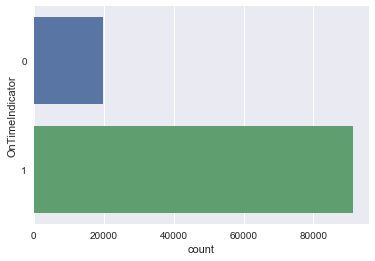

In [85]:
#show classes, we need to ensure there isn't a major class imbalance
ax = sns.countplot(y =  OnTime['OnTimeIndicator'])

plt.show()

This is actually probably a big enough class imbalance that we need to address it and possibly boost for late flights.

However, we do know that we are trying to predict something that happens 20% of the time or so.  We also know that there is a higher cost to predicting false positives.  The operation at the airline will ultimately plan staffing, gating, and shift schedules based on both the schedule and our prediction of ontime performance.  Therefore, if we predict that the airline will run ontime, and it doesnt we will potentially cost the company a great deal of money in overtime (up to 3X pay).  Therefore, it probably makes sense to look at both accuracy and precision in our resultset.  We could make the argument for recall.  However, it is much more expensive to pay an entire staff triple-time than to have a few extra folks on hand.  While no scenario is ideal, the first is the most costly.  

In [86]:
OnTime.columns.values

array(['origin', 'origin_latitude', 'origin_longitude', 'destination',
       'destination_latitude', 'destination_longitude', 'origin_country',
       'destination_country', 'flight_number', 'miles_flown',
       'departure_date', 'day_of_week', 'flight_type_code',
       'flight_route_number', 'route_sequence_number', 'aircraft_type_cde',
       'flight_cancellation_code', 'alternate_airport', 'push_delay_mins',
       'delay_type', 'delay_id', 'aircraft_seat_count',
       'aircraft_tow_weight', 'aircraft_landing_weight', 'fuel_loaded',
       'central_scheduled_dep_time', 'local_scheduled_dep_time',
       'central_scheduled_arr_time', 'local_schedulced_arr_time',
       'total_passengers', 'local_passengers', 'connecting_passengers',
       'thru_passengers', 'unaccompanied_minors',
       'total_nonrev_passengers', 'dot_security_delay_time',
       'NAS_delay_minutes', 'weather_delay_minutes', 'dot_delay_mins',
       'total_bags', 'bag_weight_total', 'freight_weight_total',
    

In [87]:
#One Hot Encode any categorical variables
#Definitely origin and destination variables
#Aircraft Code

##### NOTE ####

# I am thinking that origin and destination may not need to be one-hot coded, because we have the lat/long, using a 
# standardized version of these should be enough and would remove some of hte sparsity from the dataset.
# Also, I would recommend that we take the delay code information out of the model since we will not know what these values
# are ahead of the forecast time- These are added after the fact so we would have to build a forecast of these values

#cols_to_encode = ['origin', 'destination', 'aircraft_type_cde', 'day_of_week', 'TimeBucket', 
#                  'flight_type_code', 'International', 'delay_type', 'delay_id']
#OnTime = pd.get_dummies(OnTime,columns = cols_to_encode)

In [88]:
####################################
###### ALTERNATE ONE HOT CODE ######
####################################

cols_to_encode = ['aircraft_type_cde', 'day_of_week', 'TimeBucket', 
                'International']
OnTime = pd.get_dummies(OnTime,columns = cols_to_encode)


In [89]:
OnTime.describe()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,flight_number,miles_flown,flight_route_number,route_sequence_number,push_delay_mins,aircraft_seat_count,...,day_of_week_6,day_of_week_7,TimeBucket_deep_shoulder_am,TimeBucket_shoulder_am,TimeBucket_am_meat,TimeBucket_pm_meat,TimeBucket_shoulder_pm,TimeBucket_deep_shoulder_pm,International_0,International_1
count,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,...,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000
mean,36.000711,-97.204804,36.003330,-97.208694,2135.389123,760.316618,312.861069,3.527720,3.829841,146.832687,...,0.105317,0.150547,0.039908,0.068858,0.304804,0.477871,0.092207,0.016352,0.980289,0.019711
std,5.055974,16.076966,5.059994,16.090650,1365.850855,464.998176,181.796940,1.931696,13.977466,11.447985,...,0.306963,0.357608,0.195744,0.253213,0.460326,0.499512,0.289319,0.126827,0.139006,0.139006
min,9.992500,-122.595000,9.992500,-122.595000,1.000000,137.000000,1.000000,1.000000,0.000000,122.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.846940,-115.158890,32.846940,-115.158890,939.000000,377.000000,158.000000,2.000000,0.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,36.079720,-95.278610,36.079720,-95.278610,2110.000000,650.000000,316.000000,3.000000,0.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,39.858330,-83.344440,39.858330,-83.344440,3118.000000,997.000000,464.000000,5.000000,2.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,47.620000,-66.002220,47.620000,-66.002220,6980.000000,2627.000000,647.000000,10.000000,779.000000,175.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


When we look at our new one-hot coded values, they make sense.  We expect between 20% - 23% of all flights to be in the shoulder periods and that is exactly what we have here.  We also see that about 2% of the flights are international flights.  This is reflective of the 'mystery' airline's network structure.  we also see an accurate representation in the day of week buckets.  Therefore the data looks pretty clean now.

<a id="Selection"></a>
<a href="#top">Back to Top</a>

# Variable selection for Modeling

We know that there are some fields that should not be included in the model for several reasons:
    1.) They have no statistical bearing
    2.) They are too hard to model
    3.) Contextually, we would not have this information available to us at the time of forecasting (pre-flight)

With this in mind we will select those variables accordingly.  **Please note** : that this approach relies mostly on domain expertise and not on any statistical techniques

**Selected Variables**:
    
    * origin lat/long
    2.) destination lat/long
    3.) miles_flown
    4.) one hot encoded day of week
    5.) route_sequence_number
    6.) originator_indicator
    7.) one hot encoded aircraft type
    8.) push delay minutes - remember this is different than DOT delay mins
    9.) aircraft_seat_count
    10.) aircraft tow weight
    11.) fuel loaded
    12.) local scheduled departure time
    13.) total passengers
    14.) local passengers
    15.) connecting passengers
    16.) thru passengers
    17.) unaccompanied minors
    18.) total nonrev passengers
    19.) total bags
    20.) bag weight total
    21.) freight weight total
    22.) scheduled turn minutes
    23.) itins in
    24.) itins out
    25.) itins on leg
 
    


In [90]:
#Y set: 
Y=np.array(OnTime['OnTimeIndicator'])


#columnstotake=np.r_[1, 2, 3, 4, 8, 14, 15, 16, 17, 18, 25:30, 31:40, 41:285]
#columnstotake=np.r_[1, 2, 3, 4, 8, 14, 15, 16, 17, 18, 25:30]

columnstotake = np.r_[2, 3, 5, 6, 10, 14, 17, 20, 23, 25, 28:34, 38:45, 46, 48:68]
columnstotake = columnstotake - 1

#X Set:
#X=OnTime.ix[:, [-'OnTimeIndicator']]
X=OnTime.ix[:,columnstotake]
X.columns.values

array(['origin_latitude', 'origin_longitude', 'destination_latitude',
       'destination_longitude', 'miles_flown', 'route_sequence_number',
       'push_delay_mins', 'aircraft_seat_count', 'fuel_loaded',
       'local_scheduled_dep_time', 'total_passengers', 'local_passengers',
       'connecting_passengers', 'thru_passengers', 'unaccompanied_minors',
       'total_nonrev_passengers', 'total_bags', 'bag_weight_total',
       'freight_weight_total', 'scheduled_turn_minutes', 'itins_in',
       'itins_out', 'itins_on_leg', 'Originator_ind',
       'aircraft_type_cde_2', 'aircraft_type_cde_3', 'aircraft_type_cde_5',
       'aircraft_type_cde_6', 'aircraft_type_cde_8', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'TimeBucket_deep_shoulder_am',
       'TimeBucket_shoulder_am', 'TimeBucket_am_meat',
       'TimeBucket_pm_meat', 'TimeBucket_shoulder_pm',
       'TimeBucket_deep_shoulder_pm', 'Internation

<a id="Task1"></a>
<a href="#top">Back to Top</a>

# Modeling - Classification Task 1 - DOT Ontime Performance

<a id="T1Log1"></a>

### Logistic Regression

In [25]:
%%time
# first attempt with defaults

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables

cv = StratifiedKFold(n_splits=10) 

clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])

total_accuracy_log_reg_1 = mt.accuracy_score(Y,yhat)
conf_matrix_1 = mt.confusion_matrix(Y,yhat)

precision = conf_matrix_1[1,1] / (conf_matrix_1[1,1]+ conf_matrix_1[0,1])
recall = conf_matrix_1[1,1] / (conf_matrix_1[1,1]+ conf_matrix_1[1,0])
f_measure = (2* conf_matrix_1[1,1]) / ((2* conf_matrix_1[1,1])+ conf_matrix_1[1,0] + conf_matrix_1[0,1])

print('-------------------------------')
print('Logistic Regression Output')
print( total_accuracy_log_reg_1)
print(conf_matrix_1)
print('Precision: ',precision, 'Recall: ',recall, 'F-measure: ', f_measure)


-------------------------------
Logistic Regression Output
0.864823735987
[[ 6840 13000]
 [ 2012 89203]]
Precision:  0.872802168234 Recall:  0.977942224415 F-measure:  0.922385713843
Wall time: 14.5 s


In [27]:
%%time
# using a gridsearch on logistic regression to solve for 'C' with accuracy as a target measure

# source: http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html

from sklearn.model_selection import GridSearchCV

yhat = np.zeros(Y.shape)

cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'C': [0.5, 1, 10, 100, 1000]}]

scores = ['accuracy','precision','recall',]
                    
for score in scores:
    clf = GridSearchCV(LogisticRegression(penalty='l2', C=0.5, class_weight=None), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(XScl[train],Y[train])
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)



the best parameters solving for accuracy  are:  {'C': 10}
the best parameters solving for precision  are:  {'C': 10}
the best parameters solving for recall  are:  {'C': 10}
Wall time: 2min 45s


In [28]:
%%time

# this model looks like the best.  Let's see which variables are most important.


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables

cv = StratifiedKFold(n_splits=10) 

clf = LogisticRegression(penalty='l2', C=10.0, class_weight=None)

for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])

total_accuracy_log_reg_1 = mt.accuracy_score(Y,yhat)
conf_matrix_1 = mt.confusion_matrix(Y,yhat)

precision = conf_matrix_1[1,1] / (conf_matrix_1[1,1]+ conf_matrix_1[0,1])
recall = conf_matrix_1[1,1] / (conf_matrix_1[1,1]+ conf_matrix_1[1,0])
f_measure = (2* conf_matrix_1[1,1]) / ((2* conf_matrix_1[1,1])+ conf_matrix_1[1,0] + conf_matrix_1[0,1])

print('-------------------------------')
print('Logistic Regression Output')
print( total_accuracy_log_reg_1)
print(conf_matrix_1)
print('Precision: ',precision, 'Recall: ',recall, 'F-measure: ', f_measure)

-------------------------------
Logistic Regression Output
0.822007113592
[[  387 19453]
 [  314 90901]]
Precision:  0.823721840622 Recall:  0.996557583731 F-measure:  0.901934325219
Wall time: 12.3 s


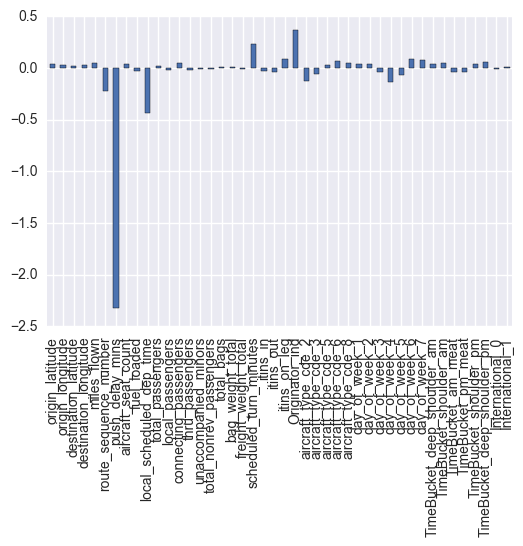

In [122]:

weights = pd.Series(clf.coef_[0], index = list([np.array(X.columns.values)]))

#weights = pd.Series(clf.coef_, index = list([np.array(X.columns.values)]))

ax = weights.plot(kind = 'bar')



<a id="T1Log1Comments"></a>

#### Commentary

In the initial run. we were able to get 86% accuracy with the scaled variables.  That being said, we cheated a little bit by including the push delay minutes as part of the X-variables dataset.  This could be a really good forecasting methodology when we are trying to predict at the origin airport whether or not a flight will be delayed.  However, for longer term planning, this variable will not be known.  We also ran a grid search on this logistic regression solving for c and found that the default value of 1 seems to be the best parameter for regularization.  In this case, given that we have a great deal of observations, this is not all that surprising, because we would expect that we might be including more values than necessary by widening the parameter.

##### Weights
The weight interpretation is very interesting for this model. As mentioned before, we cheated a little bit by including push delays in predicting ontime performance, and we see that this is the most important variable in the dataset.  However, another very important term is the scheduled departure time.  This makes a ton of sense.  We know that OTP varies by time of day and that the mere intrinsic property of being at a certain time of day means that more things tend to go wrong and hence OTP suffers.  We also notice that whether a flight is an originator is very important.  These have a very high OTP.  The amount of turn time is also important in the model.  Also, this makes sense.  The more time you have to turn an aircraft, the more likely you are to be ontime.  It also looks like the number of connecting passgengers, while a relatively low weight, plays an important role in the model.  Additionally, the miles flown makes a huge difference in the OTP as well.  Given these results, we may remove the departure delay minutes and see if we get the same results.

<a id="T1Log2"></a>
<a href="#top">Back to Top</a>

### Logistic Regression 2

In this run, we remove the telltale variable of delay minutes to see what impacts that has on the model.

In [29]:
%%time
#reset the variables by removing delay minutes
columnstotake = np.r_[2, 3, 5, 6, 10, 14, 20, 23, 25, 28:34, 38:45, 46, 48:68]
columnstotake = columnstotake - 1



X=OnTime.ix[:,columnstotake]


scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables



cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'C': [0.5, 1, 10, 100, 1000]}]

scores = ['accuracy','precision','recall']
                    
for score in scores:
    clf = GridSearchCV(LogisticRegression(penalty='l2', C=0.5, class_weight=None), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(XScl[train],Y[train])
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)


the best parameters solving for accuracy  are:  {'C': 10}
the best parameters solving for precision  are:  {'C': 10}
the best parameters solving for recall  are:  {'C': 10}
Wall time: 2min 46s


It looks like C = 10 is the best regularization to use.  We run our previous model to see what everything looks like.  This is very encouraging since we took out our heaviest weighting from the previous model.

In [50]:
%%time

from sklearn.metrics import roc_curve, auc
from scipy import interp

scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables

yhat = np.zeros(Y.shape)

cv = StratifiedKFold(n_splits=10) 

clf = LogisticRegression(penalty='l2', C=10.0, class_weight=None)


for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])
        

total_accuracy_log_reg_2 = mt.accuracy_score(Y,yhat)
conf_matrix_2 = mt.confusion_matrix(Y,yhat)

precision_2 = conf_matrix_2[1,1] / (conf_matrix_2[1,1]+ conf_matrix_2[0,1])
recall_2 = conf_matrix_2[1,1] / (conf_matrix_2[1,1]+ conf_matrix_2[1,0])
f_measure_2 = (2* conf_matrix_2[1,1]) / ((2* conf_matrix_2[1,1])+ conf_matrix_2[1,0] + conf_matrix_2[0,1])

print('-------------------------------')
print('Logistic Regression Output')
print( total_accuracy_log_reg_2)
print(conf_matrix_2)
print('Precision: ',precision_2, 'Recall: ',recall_2, 'F-measure: ', f_measure_2)

-------------------------------
Logistic Regression Output
0.822007113592
[[  387 19453]
 [  314 90901]]
Precision:  0.823721840622 Recall:  0.996557583731 F-measure:  0.901934325219
Wall time: 12 s


We managed to maintain a great deal of accuracy and precision even without this variable. However, we notice that this model is not really doing anything. The model is basically now classifying everything as ontime.

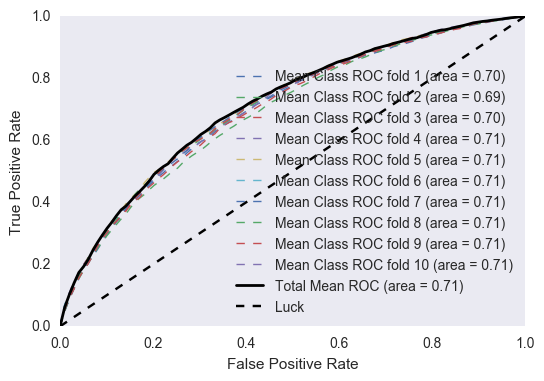

In [55]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split


X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = LogisticRegression(penalty='l2', C=10.0, class_weight=None)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

This shows a very interesting representation of the results.  Basically, this graph reinforces what we already saw in the results.  While we are doing better than chance, and our false positive rate is lower than our true positive rate at any point in the curve, we are not providing good accuracy.  With an area of only .70, we can see that our tradeoff is definitely not what we would like to see given the high expense involved with getting a false positive.  Additionally, we know that this model does a very poor job with classifying negatives, which is not shown here.


We did want to take a look at the weights of this model, just to see what it is attempting to learn from.

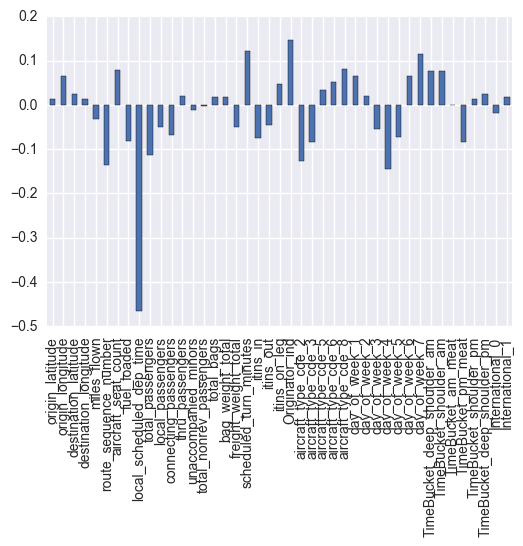

In [129]:
weights = pd.Series(clf.coef_[0], index = list([np.array(X.columns.values)]))

#weights = pd.Series(clf.coef_, index = list([np.array(X.columns.values)]))

ax = weights.plot(kind = 'bar')

<a id="T1Log2Comments"></a>
<a href="#top">Back to Top</a>

#### Commentary

This model appears to do a very nice job of classifying flights correctly at first glance.  We have pretty good precision for this model.  Our precision is actually about the same as our accuracy.  This is good.  However, we have to watch out in future models for the potential for the model to just classify everything as ontime. **This model is not actually learning and classifying correctly.  It is just saying everything is ontime. Therefore, we would not consider a logistic regression in future modeling exercises.**

##### Weights
The weights are very interesting in this case.  We see that the local departure time is very important, along with whether a flight is an originator.  We see that the am shoulder and the PM meat are very important in the time of say realm.  We also see that the route sequence number is very important in this case as well.  The turn minutes continue to be an important factor as well.  Additionally, Thursdays seem to be a day of week that could be scrutinized further. Overall, while the model is not doing a very good job of breaking down the problem, the weights do show very reasonable practical significance



<a id="T1KNN1"></a>
<a href="#top">Back to Top</a>

### KNN classifier

We know that KNN suffers from the curse of dimensionality and that we should probably trim our dataset down a bit prior to running this classifier; however, let's just take a run with this one to see how long it takes.  We can modify subsequent models.

In [206]:
%%time
# Trying a regular KNN - takes 16 minutes DO NOT RERENDER

from sklearn.neighbors import KNeighborsClassifier

yhat = np.zeros(Y.shape)

cv = StratifiedKFold(n_splits=10) 

clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric = 'euclidean')

for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])

total_accuracy_3 = mt.accuracy_score(Y,yhat)
conf_matrix_3 = mt.confusion_matrix(Y,yhat)

precision_3 = conf_matrix_3[1,1] / (conf_matrix_3[1,1]+ conf_matrix_3[0,1])
recall_3 = conf_matrix_3[1,1] / (conf_matrix_3[1,1]+ conf_matrix_3[1,0])
f_measure_3 = (2* conf_matrix_3[1,1]) / ((2* conf_matrix_3[1,1])+ conf_matrix_3[1,0] + conf_matrix_3[0,1])

print('-------------------------------')
print('KNN Output')
print( total_accuracy_3)
print(conf_matrix_3)
print('Precision: ',precision_3, 'Recall: ',recall_3, 'F-measure: ', f_measure_3)

-------------------------------
KNN Output
0.798262122372
[[ 3027 16813]
 [ 5591 85624]]
Precision:  0.835869851714 Recall:  0.938705256811 F-measure:  0.884307933819
Wall time: 17min 50s


We know that KNN suffers from the curse of dimensionality, and has a hard time with all of the data we have thrown at it.  Therefore, we will reduce the number of variables fed into the model and see if we can run through the calculations faster based on what we learned in the logistic regression weights.

Also, note that while accuracy dropped, but our level of precision slightly increased. It does appear that 

In [207]:
%%time
from sklearn.neighbors import KNeighborsClassifier

yhat = np.zeros(Y.shape)

X2 = X[['origin_longitude', 'local_scheduled_dep_time','Originator_ind','scheduled_turn_minutes','aircraft_seat_count']]

scl = StandardScaler() # import the standardscaler
XScl2 = scl.fit_transform(X2)

cv = StratifiedKFold(n_splits=10) 

clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric = 'euclidean')

for train, test in cv.split(XScl2,Y):
    clf.fit(XScl2[train],Y[train])
    yhat[test] = clf.predict(XScl2[test])

total_accuracy_4 = mt.accuracy_score(Y,yhat)
conf_matrix_4 = mt.confusion_matrix(Y,yhat)

precision_4 = conf_matrix_4[1,1] / (conf_matrix_4[1,1]+ conf_matrix_4[0,1])
recall_4 = conf_matrix_4[1,1] / (conf_matrix_4[1,1]+ conf_matrix_4[1,0])
f_measure_4 = (2* conf_matrix_4[1,1]) / ((2* conf_matrix_4[1,1])+ conf_matrix_4[1,0] + conf_matrix_4[0,1])

print('-------------------------------')
print('KNN Output- trimmed dataset')
print( total_accuracy_4)
print(conf_matrix_4)
print('Precision: ',precision_4, 'Recall: ',recall_4, 'F-measure: ', f_measure_4)

-------------------------------
KNN Output- trimmed dataset
0.790545225339
[[ 2823 17017]
 [ 6244 84971]]
Precision:  0.833147036906 Recall:  0.931546346544 F-measure:  0.879603318789
Wall time: 31.6 s


Alright, that ran much faster, and accuracy and recall were very similar.  Since we have so many records, we may worry that some of our forecasts happen by chance.  However, it does still appear that this model provides more insight than the logistic regression.  Let's do a gridsearch on K to see what the best combination of attributes is.

In [189]:
%%time

from sklearn.neighbors import KNeighborsClassifier


tuned_parameters = [{'metric': ['minkowski'],'n_neighbors': [3, 4, 5, 6, 7]},
                    {'metric': ['euclidean'],'n_neighbors': [3, 4, 5, 6, 7]},
                    {'metric': ['manhattan'],'n_neighbors': [3, 4, 5, 6, 7]}]

scores = ['accuracy','precision','recall']
                    
for score in scores:
    clf = GridSearchCV(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric = 'euclidean', n_jobs = -1), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(XScl2[train],Y[train])
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'metric': 'manhattan', 'n_neighbors': 7}
the best parameters solving for precision  are:  {'metric': 'manhattan', 'n_neighbors': 7}
the best parameters solving for recall  are:  {'metric': 'manhattan', 'n_neighbors': 7}
Wall time: 29min 5s


It looks like the best model would have 7 neighbors and use manhattan distance no matter how we measure the model's strength.  We will run those values below.

In [57]:
%%time
from sklearn.neighbors import KNeighborsClassifier

yhat = np.zeros(Y.shape)

X2 = X[['origin_longitude', 'local_scheduled_dep_time','Originator_ind','scheduled_turn_minutes','aircraft_seat_count']]

scl = StandardScaler() # import the standardscaler
XScl2 = scl.fit_transform(X2)

cv = StratifiedKFold(n_splits=10) 

clf = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric = 'manhattan')

for train, test in cv.split(XScl2,Y):
    clf.fit(XScl2[train],Y[train])
    yhat[test] = clf.predict(XScl2[test])

total_accuracy_5 = mt.accuracy_score(Y,yhat)
conf_matrix_5 = mt.confusion_matrix(Y,yhat)

precision_5 = conf_matrix_5[1,1] / (conf_matrix_5[1,1]+ conf_matrix_5[0,1])
recall_5 = conf_matrix_5[1,1] / (conf_matrix_5[1,1]+ conf_matrix_5[1,0])
f_measure_5 = (2* conf_matrix_5[1,1]) / ((2* conf_matrix_5[1,1])+ conf_matrix_5[1,0] + conf_matrix_5[0,1])

print('-------------------------------')
print('KNN Output - 7 neighbors, manhattan distance')
print( total_accuracy_5)
print(conf_matrix_5)
print('Precision: ',precision_5, 'Recall: ',recall_5, 'F-measure: ', f_measure_5)

-------------------------------
KNN Output - 7 neighbors, manhattan distance
0.799549772635
[[ 2354 17486]
 [ 4775 86440]]
Precision:  0.831745665185 Recall:  0.947651153867 F-measure:  0.885923511717
Wall time: 30.4 s


This model only provided a little bit more accuracy.  We will use this as the baseline knn to compare confidence intervals to other models.  It does look like this model is learning a little bit more than the linear regression.  However, the false and true negatives are still very low.  Let's looks that the ROC curves to see if we like what we see.

Wall time: 21.7 s


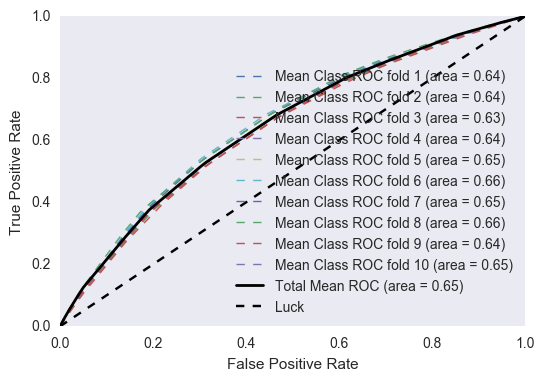

In [59]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split

X2 = X[['origin_longitude', 'local_scheduled_dep_time','Originator_ind','scheduled_turn_minutes','aircraft_seat_count']]

scl = StandardScaler() # import the standardscaler
XScl2 = scl.fit_transform(X2)

X_train, X_test, y_train, y_test = train_test_split(XScl2, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric = 'manhattan')

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

It looks like this model actually performs more poorly in the sense of the tradeoff between false positives and true negatives.  We are not seeing the differential climb the way we would like.  Therefore, this model does not look very promising

<a id="T1DT"></a>
<a href="#top">Back to Top</a>

### Decision Tree

In [61]:
%%time

# we will also try a simple decision tree

from sklearn.tree import DecisionTreeClassifier

yhat = np.zeros(Y.shape)

cv = StratifiedKFold(n_splits=10) 

clf = DecisionTreeClassifier()

for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])

total_accuracy_6 = mt.accuracy_score(Y,yhat)
conf_matrix_6 = mt.confusion_matrix(Y,yhat)

precision_6 = conf_matrix_6[1,1] / (conf_matrix_6[1,1]+ conf_matrix_6[0,1])
recall_6 = conf_matrix_6[1,1] / (conf_matrix_6[1,1]+ conf_matrix_6[1,0])
f_measure_6 = (2* conf_matrix_6[1,1]) / ((2* conf_matrix_6[1,1])+ conf_matrix_6[1,0] + conf_matrix_6[0,1])

print('-------------------------------')
print('Decision Tree Output')
print( total_accuracy_6)
print(conf_matrix_6)
print('Precision: ',precision_6, 'Recall: ',recall_6, 'F-measure: ', f_measure_6)

-------------------------------
Decision Tree Output
0.726270766737
[[ 5971 13869]
 [16530 74685]]
Precision:  0.843383698083 Recall:  0.818779805953 F-measure:  0.830899654557
Wall time: 18.4 s


Well, this model does worse than our other 2 models.  However, this is the highest level of precision we have seen so far.  Let's try using entropy to see if out model produces different results.

In [210]:
%%time

# decision tree with entropy

from sklearn.tree import DecisionTreeClassifier

yhat = np.zeros(Y.shape)

cv = StratifiedKFold(n_splits=10) 

clf = DecisionTreeClassifier(criterion ='entropy')

for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])

total_accuracy_7 = mt.accuracy_score(Y,yhat)
conf_matrix_7 = mt.confusion_matrix(Y,yhat)

precision_7 = conf_matrix_7[1,1] / (conf_matrix_7[1,1]+ conf_matrix_7[0,1])
recall_7 = conf_matrix_7[1,1] / (conf_matrix_7[1,1]+ conf_matrix_7[1,0])
f_measure_7 = (2* conf_matrix_7[1,1]) / ((2* conf_matrix_7[1,1])+ conf_matrix_7[1,0] + conf_matrix_7[0,1])


print('-------------------------------')
print('Decision Tree Output- entropy')
print( total_accuracy_7)
print(conf_matrix_7)
print('Precision: ',precision_7, 'Recall: ',recall_7, 'F-measure: ', f_measure_7)

-------------------------------
Decision Tree Output- entropy
0.730079690244
[[ 5706 14134]
 [15842 75373]]
Precision:  0.842090562749 Recall:  0.82632242504 F-measure:  0.834131981718
Wall time: 18.5 s


Just as predicted, our results are very similar.  We could stick with entropy as it is about the same.

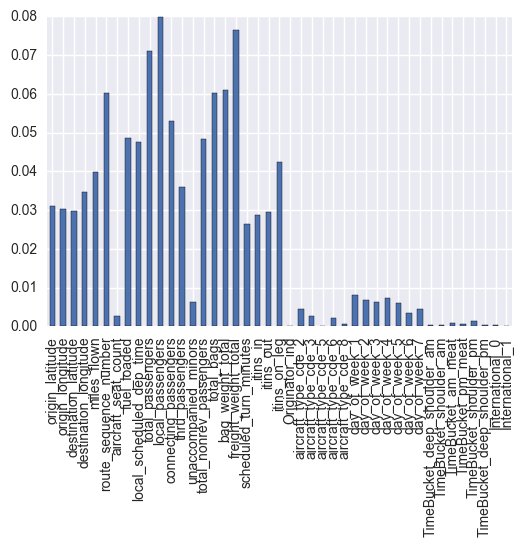

In [153]:
importances =  pd.Series(clf.feature_importances_, index = list([np.array(X.columns.values)]))

ax = importances.plot(kind = 'bar')


It is interesting that this model has very different feature importances than the logistic regression.  The importances of the logistic regression seemed to make a bit more sense from the position of practical significance. 

It is also important to look at the tradeoffs between false positives and true positives in this model.  Let's look at a ROC curve

Wall time: 16 s


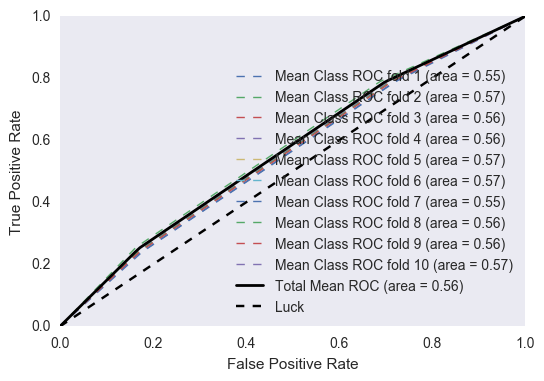

In [62]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split


X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = DecisionTreeClassifier(criterion ='entropy')

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

Ouch!   This model barely peforms better than chance for false positive rate classification.  This would probably not be a good model to use.

In [166]:
# let's make a graphic for this model

from sklearn.tree import export_graphviz

export_graphviz(clf, out_file = 'tree.dot')

Wow!  The graphic (not shown here) is so complex that graphviz had to shrink the image and it is not even intelligible.  Let's just see what a simplified model gives us with the most important variables and limited depth.  The tree can be viewed in the github repository for this report (https://github.com/dpmurraygt/OnTime.git)

In [211]:
%%time

##Decision tree with the trimmed down varibles used in the previous model for knn.

yhat = np.zeros(Y.shape)

cv = StratifiedKFold(n_splits=10) 

clf = DecisionTreeClassifier(criterion ='entropy', max_depth = 6 ) # old was 6

for train, test in cv.split(XScl2,Y):
    clf.fit(XScl2[train],Y[train])
    yhat[test] = clf.predict(XScl2[test])

total_accuracy_8 = mt.accuracy_score(Y,yhat)
conf_matrix_8 = mt.confusion_matrix(Y,yhat)

precision_8 = conf_matrix_8[1,1] / (conf_matrix_8[1,1]+ conf_matrix_8[0,1])
recall_8 = conf_matrix_8[1,1] / (conf_matrix_8[1,1]+ conf_matrix_8[1,0])
f_measure_8 = (2* conf_matrix_8[1,1]) / ((2* conf_matrix_8[1,1])+ conf_matrix_8[1,0] + conf_matrix_8[0,1])


print('-------------------------------')
print('Decision Tree Output')
print( total_accuracy_8)
print(conf_matrix_8)
print('Precision: ',precision_8, 'Recall: ',recall_8, 'F-measure: ', f_measure_8)

-------------------------------
Decision Tree Output
0.821394804376
[[   37 19803]
 [   32 91183]]
Precision:  0.821572090174 Recall:  0.999649180508 F-measure:  0.901904540531
Wall time: 849 ms


It is very interesting that our simplified decision tree only does about 2 points worse in precision, but our accuracy increases a great deal. Let's make a tree plot to see what the decision bounds look like. ** Once again, this mode is not doing anything**

In [195]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file = 'tree2.dot', feature_names = ['origin_longitude', 'local_scheduled_dep_time',
                                                              'Originator_ind','scheduled_turn_minutes',
                                                              'aircraft_seat_count'])

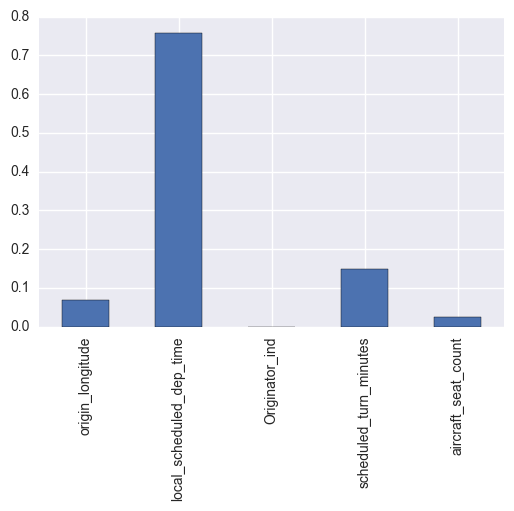

In [201]:
importances =  pd.Series(clf.feature_importances_, index = ['origin_longitude', 'local_scheduled_dep_time',
                                                              'Originator_ind','scheduled_turn_minutes',
                                                              'aircraft_seat_count'] )

ax = importances.plot(kind = 'bar')


In [212]:
yhat = np.zeros(Y.shape)

X3 = X[[ 'local_scheduled_dep_time','scheduled_turn_minutes']]

scl = StandardScaler() # import the standardscaler
XScl3 = scl.fit_transform(X3)


cv = StratifiedKFold(n_splits=10) 

clf = DecisionTreeClassifier(criterion ='entropy', max_depth = 6 ) # old was 6

for train, test in cv.split(XScl3,Y):
    clf.fit(XScl3[train],Y[train])
    yhat[test] = clf.predict(XScl3[test])

total_accuracy_9 = mt.accuracy_score(Y,yhat)
conf_matrix_9 = mt.confusion_matrix(Y,yhat)

precision_9 = conf_matrix_9[1,1] / (conf_matrix_9[1,1]+ conf_matrix_9[0,1])
recall_9 = conf_matrix_9[1,1] / (conf_matrix_9[1,1]+ conf_matrix_9[1,0])
f_measure_9 = (2* conf_matrix_9[1,1]) / ((2* conf_matrix_9[1,1])+ conf_matrix_9[1,0] + conf_matrix_9[0,1])

print('-------------------------------')
print('Decision Tree Output - turn and dep time')
print( total_accuracy_9)
print(conf_matrix_9)
print('Precision: ',precision_9, 'Recall: ',recall_9, 'F-measure: ', f_measure_9)

-------------------------------
Decision Tree Output - turn and dep time
0.82134978164
[[    0 19840]
 [    0 91215]]
Precision:  0.82134978164 Recall:  1.0 F-measure:  0.901913284224


These results are a little misleading.  The model sees that it can get away with classifying no negatives and only classifying ontime flights.  This model is not doing anything.

Maybe a less confusing approach would be to simply use time of day in the tree

In [217]:
yhat = np.zeros(Y.shape)

X4 = X[['local_scheduled_dep_time']]

scl = StandardScaler() # import the standardscaler
XScl4 = scl.fit_transform(X4)


cv = StratifiedKFold(n_splits=10) 

clf = DecisionTreeClassifier(criterion ='entropy', max_depth = 5 ) # old was 6

for train, test in cv.split(XScl4,Y):
    clf.fit(XScl4[train],Y[train])
    yhat[test] = clf.predict(XScl4[test])

total_accuracy_10 = mt.accuracy_score(Y,yhat)
conf_matrix_10 = mt.confusion_matrix(Y,yhat)

precision_10 = conf_matrix_10[1,1] / (conf_matrix_10[1,1]+ conf_matrix_10[0,1])
recall_10 = conf_matrix_10[1,1] / (conf_matrix_10[1,1]+ conf_matrix_10[1,0])
f_measure_10 = (2* conf_matrix_10[1,1]) / ((2* conf_matrix_10[1,1])+ conf_matrix_10[1,0] + conf_matrix_10[0,1])

print('-------------------------------')
print('Decision Tree Output - dep time')
print( total_accuracy_10)
print(conf_matrix_10)
print('Precision: ',precision_10, 'Recall: ',recall_10, 'F-measure: ', f_measure_10)

-------------------------------
Decision Tree Output - dep time
0.821340777092
[[    1 19839]
 [    2 91213]]
Precision:  0.821353960307 Recall:  0.999978073782 F-measure:  0.901906885453


In [219]:
# make another graph

from sklearn.tree import export_graphviz

export_graphviz(clf, out_file = 'tree3.dot', feature_names = ['local_scheduled_dep_time'])

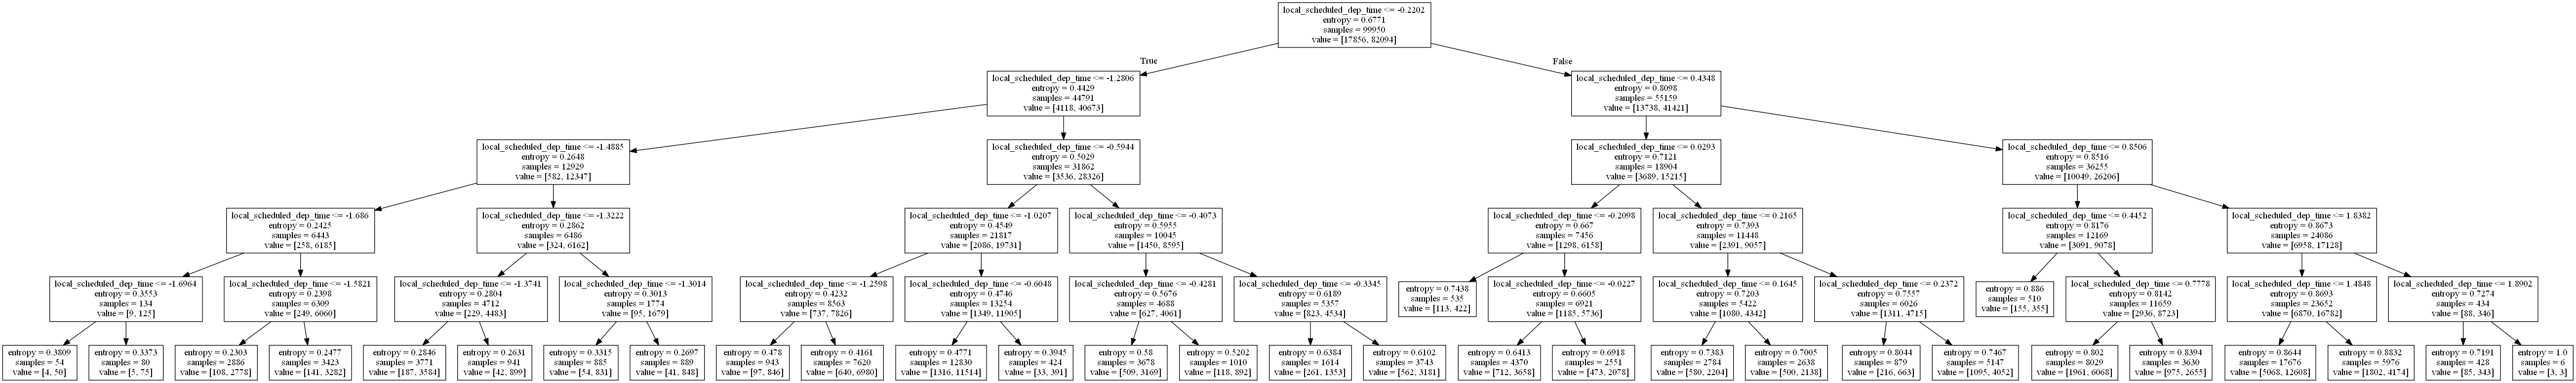

In [221]:
# once again, this model is really not doing anything

from IPython.display import Image
Image(filename='tre2.png')

# note: in the command line, steps include:
    # ensure that path variable is set for the bin location of graphviz
    # navigate to directory (for ease of use) where file is stored
    # dot -Tpng tree3.dot -o tre2.png

<a id="T1NaiveBayes"></a>
<a href="#top">Back to Top</a>

### Naive Bayes 

In [28]:
%%time


from sklearn.naive_bayes import BernoulliNB # doing Bernoulli because of Binary classification
from sklearn.model_selection import ShuffleSplit

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = BernoulliNB()

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)


total_accuracy_12 = mt.accuracy_score(Y,yhat)
conf_matrix_12 = mt.confusion_matrix(Y,yhat)

precision_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[0,1])
recall_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[1,0])
f_measure_12 = (2* conf_matrix_12[1,1]) / ((2* conf_matrix_12[1,1])+ conf_matrix_12[1,0] + conf_matrix_12[0,1])

print('-------------------------------')
print('Naive Bayes Output')
print( total_accuracy_12)
print(conf_matrix_12)
print('Precision: ',precision_12, 'Recall: ',recall_12, 'F-measure: ', f_measure_12)


-------------------------------
Naive Bayes Output
0.767664670659
[[10355  9485]
 [16317 74898]]
Precision:  0.887595842765 Recall:  0.821114948199 F-measure:  0.853062107769
Wall time: 1.92 s


Whoa!  Naive Bayes looks like it does a really nice job on providing good precision.  This is the highest level of precision we have seen at 0.887

Let's see if we can tune the model to get even better results

In [34]:
%%time

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import BernoulliNB


cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'alpha': [0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 3.5], 'fit_prior': ['True']},
                    {'alpha': [0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 3.5], 'fit_prior': ['False']}]

scores = ['accuracy','precision','recall',]
                    
for score in scores:
    clf = GridSearchCV(BernoulliNB(alpha = 1.0, fit_prior = 'True'), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(XScl[train],Y[train])
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'alpha': 3.5, 'fit_prior': 'True'}
the best parameters solving for precision  are:  {'alpha': 3.5, 'fit_prior': 'True'}
the best parameters solving for recall  are:  {'alpha': 3.5, 'fit_prior': 'True'}
Wall time: 1min 33s


In [63]:
%%time

# let's see what changing the alpha to 3.5 looks like

from sklearn.naive_bayes import BernoulliNB # doing Bernoulli because of Binary classification
from sklearn.model_selection import ShuffleSplit

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = BernoulliNB(alpha = 3.5)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)


total_accuracy_12 = mt.accuracy_score(Y,yhat)
conf_matrix_12 = mt.confusion_matrix(Y,yhat)

precision_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[0,1])
recall_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[1,0])
f_measure_12 = (2* conf_matrix_12[1,1]) / ((2* conf_matrix_12[1,1])+ conf_matrix_12[1,0] + conf_matrix_12[0,1])

print('-------------------------------')
print('Naive Bayes Output')
print( total_accuracy_12)
print(conf_matrix_12)
print('Precision: ',precision_12, 'Recall: ',recall_12, 'F-measure: ', f_measure_12)


-------------------------------
Naive Bayes Output
0.696771869794
[[ 9795 10045]
 [23630 67585]]
Precision:  0.870604147881 Recall:  0.740941731075 F-measure:  0.800556723622
Wall time: 1.81 s


This model shows almost no improvement until the 100,000ths place.  So we can say that it probably doesn't make much sense to move the parameters around in this model much.  We will stick with alpha = 1.0 in our comparison model

Wall time: 1.24 s


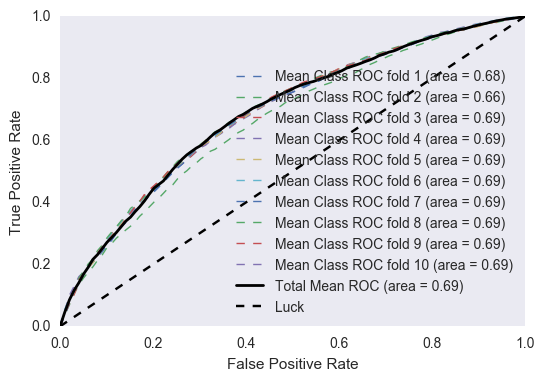

In [64]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split


X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = BernoulliNB(alpha = 3.5)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

Although the performance doesn't look amazing, we are doing much better than the KNN model.

<a id="T1Forest"></a>
<a href="#top">Back to Top</a>


### Random Forest Classifier

**Take a sample to run the grid search/ find hyper parameters**

With the diversity of data in our data set, a Random Forest may be an option to provide a good model without overfitting.

We will first use grid search with a random sample of data to find hyper parameters 

In [76]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables



idx = np.random.choice(np.arange(len(XScl)), 1000, replace=False)
x_sample = XScl[idx]
y_sample = Y[idx]

cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'n_estimators': [2, 4, 6, 8, 16, 32, 64, 128, 256, 512], 
                     'max_depth': [2, 4, 6, 8, 16, 32, 64, 128, 256, 512]}
                    ]

scores = ['accuracy','precision','recall',]
                    
for score in scores:
    clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(x_sample,y_sample)
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'max_depth': 16, 'n_estimators': 256}
the best parameters solving for precision  are:  {'max_depth': 512, 'n_estimators': 64}
the best parameters solving for recall  are:  {'max_depth': 16, 'n_estimators': 32}
CPU times: user 21min 4s, sys: 1min 24s, total: 22min 29s
Wall time: 30min 13s


The grid search with 10-fold cross validation found three different combinations to be optimal, depending on the measure employed.  In the case of accuracy, a large number of trees is employed.  This isn't unexpected that increasing the number of trees (estimators) would increase the accuracy of the model.

A relatively shallow, at least given the parameters tested, maximum depth provided both the best accuracy and recall.  A maximum depth of 16 is the best for both.  However, a higher precision demands a the maximmum depth tested - 512.

As our goal is to maximize accuracy, we will use the maximum depth of 16, with 256 estimators.

Pairing principal component analysis with the Random Forest was attempted, but did not reveal results that were different from running without the PCA.

In [77]:
%%time

#based on Dr. Larson's repository
#Random Forest with PCA
from sklearn.ensemble import RandomForestClassifier

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [
     ('CLF',RandomForestClassifier(max_depth=16, n_estimators=256, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    #print("X NAN", np.any(np.isnan(XScl[train])))
    #print("X Finite", np.any(np.isfinite(XScl[train])))
    #print("Y NAN", np.any(np.isnan(Y[train])))
    #print("Y Finite", np.any(np.isfinite(Y[train])))
    clf_pipe.fit(XScl[train],Y[train])
    yhat[test] = clf_pipe.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)
print ('Random Forest Classifier', total_accuracy)

total_accuracy_11 = mt.accuracy_score(Y,yhat)
conf_matrix_11 = mt.confusion_matrix(Y,yhat)

precision_11 = conf_matrix_11[1,1] / (conf_matrix_11[1,1]+ conf_matrix_11[0,1])
recall_11 = conf_matrix_11[1,1] / (conf_matrix_11[1,1]+ conf_matrix_11[1,0])
f_measure_11 = (2* conf_matrix_11[1,1]) / ((2* conf_matrix_11[1,1])+ conf_matrix_11[1,0] + conf_matrix_11[0,1])

print('-------------------------------')
print('Random Forest Output')
print( total_accuracy_11)
print(conf_matrix_11)
print('Precision: ',precision_11, 'Recall: ',recall_11, 'F-measure: ', f_measure_11)


Random Forest Classifier 0.865769213453
-------------------------------
Decision Tree Output - dep time
0.865769213453
[[ 6304 13536]
 [ 1371 89844]]
Precision:  0.869065583285 Recall:  0.984969577372 F-measure:  0.923394742928
CPU times: user 12min 2s, sys: 12.3 s, total: 12min 15s
Wall time: 6min 18s


The Random Forest Classifier with the specified parameters found an 86.6% accuracy of predicting On-Time Arrival.  Precision was a similar 86.9%.  Overall, the accuracy is the highest provided so far, with nearly the same precision as the Naive Bayes.

CPU times: user 8min 45s, sys: 8.76 s, total: 8min 53s
Wall time: 4min 35s


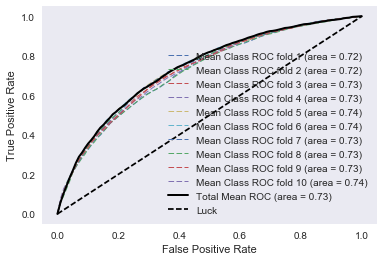

In [64]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split


X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

clf = RandomForestClassifier(max_depth=16, n_estimators=256, n_jobs=-1)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

The ROC curve for the Random Forest Classifier implies a False Positive rate of about 45% for an 80% True positive Rate.  In fact, the curve reaches 50% true positive rate with less than a 20% false positive rate.

<a id="T1Boost"></a>
<a href="#top">Back to Top</a>

### AdaBoost Classifier

Given the inherent imbalance in our classes, it is probably advisable to attempt to boost the class for Not On Time to attempt to get more classifications correct.  Several of the models represented so far have taken the approach to classify nearly everything as on time, with the result of a nearly perfect Recall but low accuracy.
As with the other models, we will employ Grid Search for optimal hyper parameters for our data set.

In [91]:
%%time

#Grid Search on Adaboost



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables


idx = np.random.choice(np.arange(len(XScl)), 1000, replace=False)
x_sample = XScl[idx]
y_sample = Y[idx]

cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'n_estimators': [2, 4, 6, 8, 16, 32, 64, 128, 256, 512],
                    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 2, 10]}
                    ]

scores = ['accuracy','precision','recall',]
                    
for score in scores:
    clf = GridSearchCV(AdaBoostClassifier(), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(x_sample,y_sample)
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'learning_rate': 0.001, 'n_estimators': 256}
the best parameters solving for precision  are:  {'learning_rate': 0.001, 'n_estimators': 256}
the best parameters solving for recall  are:  {'learning_rate': 0.001, 'n_estimators': 256}
CPU times: user 13min 21s, sys: 1.27 s, total: 13min 22s
Wall time: 13min 34s


The AdaBoost Classifier works from a base of a DecisionTreeClassifier algorithm, and then boosts the class with more incorrect observations.  In our case, our decision trees were heavily biased towards predicting "On Time" as the majority of examples were, in fact, "On Time".  However, this missed the vast majority of observations that were not on time.

A Grid Search found a best combination of estimators for the AdaBoost algorithm of 256 estimators and a learning rate of 0.001.  These values will be employed in the implementation of the algorithm.

In [66]:
%%time

from sklearn.ensemble import AdaBoostClassifier

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [
     ('CLF',AdaBoostClassifier(n_estimators=256, learning_rate=0.001))]
)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    clf_pipe.fit(XScl[train],Y[train])
    yhat[test] = clf_pipe.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)
print ('Ada Boost Classifier', total_accuracy)

total_accuracy_12 = mt.accuracy_score(Y,yhat)
conf_matrix_12 = mt.confusion_matrix(Y,yhat)

precision_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[0,1])
recall_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[1,0])
f_measure_12 = (2* conf_matrix_12[1,1]) / ((2* conf_matrix_12[1,1])+ conf_matrix_12[1,0] + conf_matrix_12[0,1])

print('-------------------------------')
print('AdaBoost Output')
print( total_accuracy_12)
print(conf_matrix_12)
print('Precision: ',precision_12, 'Recall: ',recall_12, 'F-measure: ', f_measure_12)



Ada Boost Classifier 0.860825716987
-------------------------------
AdaBoost Output
0.860825716987
[[ 6257 13583]
 [ 1873 89342]]
Precision:  0.868030119019 Recall:  0.979466096585 F-measure:  0.920387349336
CPU times: user 17.1 s, sys: 588 ms, total: 17.6 s
Wall time: 17.7 s


A similar outcome to the Random Forest and some of our improved Decision Trees - 86.1% accurate, with 86.8% Precision and 97.9% Recall.  

CPU times: user 8min 15s, sys: 7.29 s, total: 8min 23s
Wall time: 8min 23s


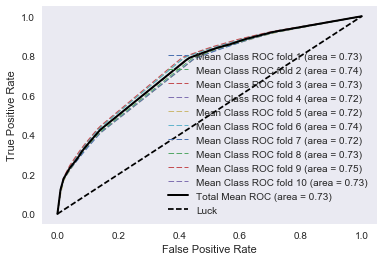

In [92]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split


X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = AdaBoostClassifier(n_estimators=256, learning_rate=0.001)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

It looks like we are getting about the same tradeoff in the ROC curve as we do with Naive Bayes in this case.  The ROC curve shows a distinct flattening in True Positive rate above the 40% false positive rate (80% True Positive Rate).  

<a id="T1Comps"></a>
<a href="#top">Back to Top</a>

### Model comparison with confidence intervals

Since Naive Bayes seems to be the best baseline model, we will compare all of the other models that look viable to that one to see if hte difference in precision is statistically significant

In [93]:
# First, let's make a summary of the accuracies

print('The precision of the Naive Bayes (Bernoulli) was 0.8711')
print('------------------------------------------------------------------')
print('The precision of the KNN algorithm was 0.8317')
print('The precision of the Decision Tree with full attribute list was 0.8421')
print('The precision of the Random Forest was 0.8691')
print('The precision of the Adaboost was 0.868030119019')

# in this case we are most interested in seeing if the naive bayes provided a statistically significant improvement over the Decision tree and KNN

# calc the errors
knn_err = 1-0.831745
dt_err = 1-0.84209
nb_err = 1-0.87116
rf_err = 1-0.8691
ab_err = 1-0.868030119019

n = 111055

# calc the variances
knn_var = (knn_err*(1-knn_err))/n
dt_var = (dt_err*(1-dt_err))/n
nb_var = (nb_err*(1-nb_err))/n
rf_var = (rf_err*(1-rf_err))/n
ab_var = (ab_err*(1-ab_err))/n




# calc the t-statistic
t = 1.96 # have enough observations that we are pretty much at normal (z)

nb_versus_dt_upper = (nb_err- dt_err) + (1.96*(np.sqrt(dt_var+nb_err)))
nb_versus_dt_lower = (nb_err- dt_err) - (1.96*(np.sqrt(dt_var+nb_err)))

nb_versus_knn_upper = (nb_err- knn_err) + (1.96*(np.sqrt(knn_var+nb_err)))
nb_versus_knn_lower = (nb_err- knn_err) - (1.96*(np.sqrt(knn_var+nb_err)))

nb_versus_rf_upper = (nb_err- rf_err) + (1.96*(np.sqrt(rf_var+nb_err)))
nb_versus_rf_lower = (nb_err- rf_err) - (1.96*(np.sqrt(rf_var+nb_err)))

nb_versus_ab_upper = (nb_err- ab_err) + (1.96*(np.sqrt(ab_var+nb_err)))
nb_versus_ab_lower = (nb_err- ab_err) - (1.96*(np.sqrt(ab_var+nb_err)))

print('------------------------------------------------------------------')
print('95% Confidence Interval Results')
print('------------------------------------------------------------------')

print('naive bayes versus KNN CI: ',nb_versus_knn_lower, ':', nb_versus_knn_upper )
print('naive bayes versus Decision Tree CI: ',nb_versus_dt_lower, ':', nb_versus_dt_upper )
print('naive bayes versus Random Forest CI: ',nb_versus_rf_lower, ':', nb_versus_rf_upper )
print('naive bayes versus Ada Boost CI: ',nb_versus_ab_lower, ':', nb_versus_ab_upper )





The precision of the Naive Bayes (Bernoulli) was 0.8711
------------------------------------------------------------------
The precision of the KNN algorithm was 0.8317
The precision of the Decision Tree with full attribute list was 0.8421
The precision of the Random Forest was 0.8691
The precision of the Adaboost was 0.868030119019
------------------------------------------------------------------
95% Confidence Interval Results
------------------------------------------------------------------
naive bayes versus KNN CI:  -0.742946509577 : 0.664116509577
naive bayes versus Decision Tree CI:  -0.732601338203 : 0.674461338203
naive bayes versus Random Forest CI:  -0.705590865954 : 0.701470865954
naive bayes versus Ada Boost CI:  -0.706660766324 : 0.700401004362


<a id="T1Summary"></a>
<a href="#top">Back to Top</a>
### Classification Task 1 - Conclusions

Well, we trained a lot of models here with varying levels of success.  We trained a **logistic regression** to start, but found that it mostly just classified ontime flights once we trimmed back the variables in hte model.  
We then moved on to **KNN classifiers**, and found that the model seemed to be classifying some negatives, which was an improvement.  We did have to trim back the number of features in the model in order to avoid overfitting and to get reasonable run times out of the model.  
After KNN, we moved on to **decision trees**.  This model approach actually gave us slightly better precision; however, the model was very complex and mostly made decisions based off of departure time.  When we trimmed the model back to just using departure time, the model reverted to classifying everything to ontime.  Actually, it only classified 3 observations as late and only one of those was correctly classified.
Next, we tried **Naive Bayes**.  This seemed like a good approach, because it would train fast and it simply uses the conditional probabilities of the events in question.  This model performed the best from a precision perspective and is a very simple model to explain.  It also appeared to have learned some things from the late flights in the model.  However, we felt like we might be missing something.
To account for the fact that we might be missing an opportunity by training many weak learners and "crowdsourcing" the solve, we tried **Random Forest** and **AdaBoost**.  The **AdaBoost** model provided very similar results to the random forest, and provided a mix of On Time and Late classification.  The **Random Forest** provided a relatively high accuracy and precision, with the expense of a lot of computation to arrive at this level.

##### Final Model  Decision

Overall, we like the Naive Bayes best.  While we found no statistically significant differences in the precision values.  We did find that the forecasting of late flights was better under the Naive Bayes model.  Additionally, when looking at the ROC curve, we say some of the best tradeoffs between true and false positives of any of the models taken into account.  That being said, we would like to go back and do a more comprehensive search through the data sources for better features or features that can be engineered for future modeling.

-----------------------------------------------------------------------------------------------------------------------

<a id="Task2"></a>
<a href="#top">Back to Top</a>

# Modeling - Classification Task 2 - D0 Performance

Another very important item to be able to forecast for any airline is how often a flight will depart at the time at which it was originally scheduled to depart.  This is important, because as the gap between scheduled departure time and actual departure time increases, the ability of the plane to get back on schedule diminishes at an increasing rate.  Additionally, a flight departing late from one station can cause a myriad of problems in the downline station.  For instance, ground crews have to recalibrate for the later flights, connecting baggage and freight increasingly bears down on turn overhead, limited gate spaces can cause gate holdouts and propogation to other flights, and connecting passengers can miss flights.  If we can better identify the variables that cause gate holdouts, we will be able to better plan and schedule the network in the future.

We will take the same approach to modeling as in the previous task.

### Redefine the Y-variable and X-variables in the model (so we don't need to rerun previous code)

In [27]:
Y=np.array(OnTime['D_zero_ind'])

print(Y[:20])

columnstotake = np.r_[2, 3, 5, 6, 10, 14, 20, 23, 25, 28:34, 38:45, 46, 48:68]
columnstotake = columnstotake - 1



X=OnTime.ix[:,columnstotake]

[0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0]


<a id="T2Log"></a>
<a href="#top">Back to Top</a>
### Logistic Regression

In [79]:
%%time
# first attempt with defaults

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables

cv = StratifiedKFold(n_splits=10) 

clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])

total_accuracy_log_reg_1 = mt.accuracy_score(Y,yhat)
conf_matrix_1 = mt.confusion_matrix(Y,yhat)

precision = conf_matrix_1[1,1] / (conf_matrix_1[1,1]+ conf_matrix_1[0,1])
recall = conf_matrix_1[1,1] / (conf_matrix_1[1,1]+ conf_matrix_1[1,0])
f_measure = (2* conf_matrix_1[1,1]) / ((2* conf_matrix_1[1,1])+ conf_matrix_1[1,0] + conf_matrix_1[0,1])

print('-------------------------------')
print('Logistic Regression Output')
print( total_accuracy_log_reg_1)
print(conf_matrix_1)
print('Precision: ',precision, 'Recall: ',recall, 'F-measure: ', f_measure)

-------------------------------
Logistic Regression Output
0.713268200441
[[ 9505 25142]
 [ 6701 69707]]
Precision:  0.734926040338 Recall:  0.912299759188 F-measure:  0.814063074794
Wall time: 12.2 s


It already appears that D0 is harder to classify in our first run. Our precision is definitely lower for this model, but we will use this as a baseline.  Let's run the gridsearch here to see what we get.

In [71]:
%%time
# using a gridsearch on logistic regression to solve for 'C' with accuracy as a target measure

# source: http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html

from sklearn.model_selection import GridSearchCV

yhat = np.zeros(Y.shape)

cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'C': [0.5, 1, 10, 100, 1000]}]

scores = ['accuracy','precision','recall',]
                    
for score in scores:
    clf = GridSearchCV(LogisticRegression(penalty='l2', C=0.5, class_weight=None), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(XScl[train],Y[train])
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'C': 1}
the best parameters solving for precision  are:  {'C': 1}
the best parameters solving for recall  are:  {'C': 1}
Wall time: 2min 29s


It looks like we have already solved for the best model in the original classification. 

Wall time: 9.24 s


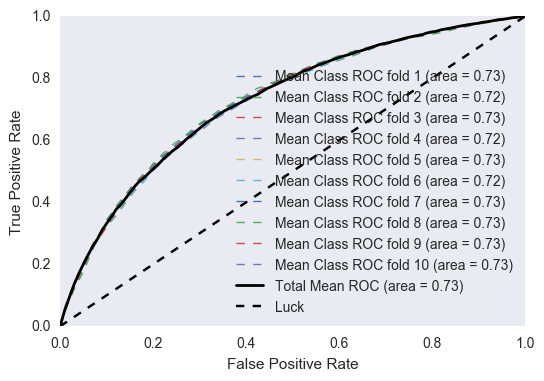

In [80]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split


X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

Based on our previous findings in this datset, this model appears to be providing pretty good tradeoffs.

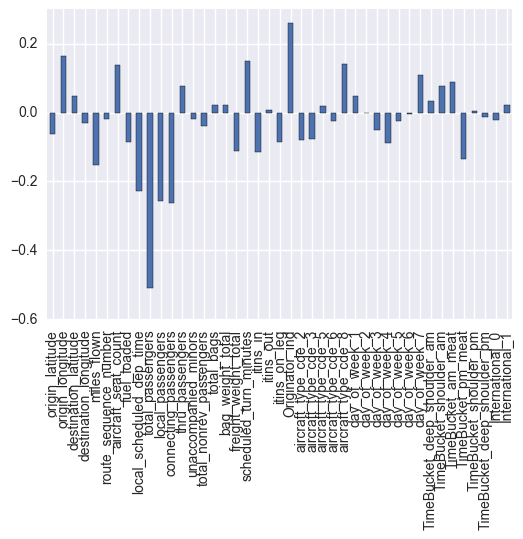

In [82]:
weights = pd.Series(clf.coef_[0], index = list([np.array(X.columns.values)]))

#weights = pd.Series(clf.coef_, index = list([np.array(X.columns.values)]))

ax = weights.plot(kind = 'bar')

Now, this is interesting, the scaled importances show us that passengers are the most important variable in the D0 performance.  This is fascinating.  Of course, the departure time is still an important factor as well.  It also looks like whether an aircraft is an originator plays an important role in departing ontime.  

<a id="T2KNN"></a>
<a href="#top">Back to Top</a>

### KNN Classifier

In [72]:
%%time
# Trying a regular KNN

from sklearn.neighbors import KNeighborsClassifier

yhat = np.zeros(Y.shape)

cv = StratifiedKFold(n_splits=10) 

clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric = 'euclidean')

for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])

total_accuracy_3 = mt.accuracy_score(Y,yhat)
conf_matrix_3 = mt.confusion_matrix(Y,yhat)

precision_3 = conf_matrix_3[1,1] / (conf_matrix_3[1,1]+ conf_matrix_3[0,1])
recall_3 = conf_matrix_3[1,1] / (conf_matrix_3[1,1]+ conf_matrix_3[1,0])
f_measure_3 = (2* conf_matrix_3[1,1]) / ((2* conf_matrix_3[1,1])+ conf_matrix_3[1,0] + conf_matrix_3[0,1])

print('-------------------------------')
print('KNN Output')
print( total_accuracy_3)
print(conf_matrix_3)
print('Precision: ',precision_3, 'Recall: ',recall_3, 'F-measure: ', f_measure_3)

-------------------------------
KNN Output
0.682427625951
[[13104 21543]
 [13725 62683]]
Precision:  0.744223873863 Recall:  0.820372212334 F-measure:  0.78044498674
Wall time: 20min 46s


In [74]:
%%time

from sklearn.neighbors import KNeighborsClassifier

# trim the variables back like last time

X2 = X[['origin_longitude', 'local_scheduled_dep_time','Originator_ind','scheduled_turn_minutes','aircraft_seat_count']]

scl = StandardScaler() # import the standardscaler
XScl2 = scl.fit_transform(X2)


tuned_parameters = [{'metric': ['minkowski'],'n_neighbors': [3, 4, 5, 6, 7]},
                    {'metric': ['euclidean'],'n_neighbors': [3, 4, 5, 6, 7]},
                    {'metric': ['manhattan'],'n_neighbors': [3, 4, 5, 6, 7]}]

scores = ['accuracy','precision','recall']
                    
for score in scores:
    clf = GridSearchCV(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric = 'euclidean', n_jobs = -1), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(XScl2[train],Y[train])
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'n_neighbors': 7, 'metric': 'minkowski'}
the best parameters solving for precision  are:  {'n_neighbors': 7, 'metric': 'minkowski'}
the best parameters solving for recall  are:  {'n_neighbors': 7, 'metric': 'minkowski'}
Wall time: 35min 20s


It looks like we get higher neighbors and minkowski distance again with our trimmed down variable set. Let's look at this model.

In [83]:
%%time
# Trying a regular KNN

from sklearn.neighbors import KNeighborsClassifier

yhat = np.zeros(Y.shape)

cv = StratifiedKFold(n_splits=10) 

clf = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric = 'minkowski')

for train, test in cv.split(XScl2,Y):
    clf.fit(XScl2[train],Y[train])
    yhat[test] = clf.predict(XScl2[test])

total_accuracy_3 = mt.accuracy_score(Y,yhat)
conf_matrix_3 = mt.confusion_matrix(Y,yhat)

precision_3 = conf_matrix_3[1,1] / (conf_matrix_3[1,1]+ conf_matrix_3[0,1])
recall_3 = conf_matrix_3[1,1] / (conf_matrix_3[1,1]+ conf_matrix_3[1,0])
f_measure_3 = (2* conf_matrix_3[1,1]) / ((2* conf_matrix_3[1,1])+ conf_matrix_3[1,0] + conf_matrix_3[0,1])

print('-------------------------------')
print('KNN Output')
print( total_accuracy_3)
print(conf_matrix_3)
print('Precision: ',precision_3, 'Recall: ',recall_3, 'F-measure: ', f_measure_3)

-------------------------------
KNN Output
0.682292557742
[[11960 22687]
 [12596 63812]]
Precision:  0.737719511208 Recall:  0.835148152026 F-measure:  0.783416305008
Wall time: 34 s


We essentially get the same level of presision and accuracy with this trimmed down model using 7 neighbors and Minkoski distance

Wall time: 20.8 s


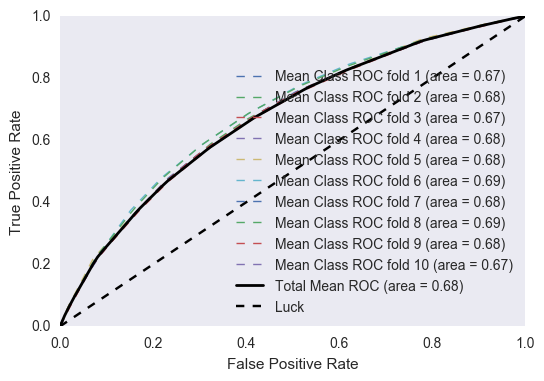

In [84]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split

X2 = X[['origin_longitude', 'local_scheduled_dep_time','Originator_ind','scheduled_turn_minutes','aircraft_seat_count']]

scl = StandardScaler() # import the standardscaler
XScl2 = scl.fit_transform(X2)

X_train, X_test, y_train, y_test = train_test_split(XScl2, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric = 'manhattan')

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()


This rock curve shows a pretty nice tradeoff in for the KNN model (relative to what we hae seen).  That being said, it may still leave a little bit to be desired

<a id="T2DT"></a>
<a href="#top">Back to Top</a>

### Decision Tree

Due to the complexities of modeling this data, we will start with the decision tree with the trimmed down variables for X that we initially created in the previous model.

In [85]:
%%time

# trimmed down tree variables first

from sklearn.tree import DecisionTreeClassifier

yhat = np.zeros(Y.shape)

X2 = X[['origin_longitude', 'local_scheduled_dep_time','Originator_ind','scheduled_turn_minutes','aircraft_seat_count']]

scl = StandardScaler() # import the standardscaler
XScl2 = scl.fit_transform(X2)

cv = StratifiedKFold(n_splits=10) 

clf = DecisionTreeClassifier()

for train, test in cv.split(XScl2,Y):
    clf.fit(XScl2[train],Y[train])
    yhat[test] = clf.predict(XScl2[test])

total_accuracy_6 = mt.accuracy_score(Y,yhat)
conf_matrix_6 = mt.confusion_matrix(Y,yhat)

precision_6 = conf_matrix_6[1,1] / (conf_matrix_6[1,1]+ conf_matrix_6[0,1])
recall_6 = conf_matrix_6[1,1] / (conf_matrix_6[1,1]+ conf_matrix_6[1,0])
f_measure_6 = (2* conf_matrix_6[1,1]) / ((2* conf_matrix_6[1,1])+ conf_matrix_6[1,0] + conf_matrix_6[0,1])

print('-------------------------------')
print('Decision Tree Output')
print( total_accuracy_6)
print(conf_matrix_6)
print('Precision: ',precision_6, 'Recall: ',recall_6, 'F-measure: ', f_measure_6)

-------------------------------
Decision Tree Output
0.675791274594
[[13755 20892]
 [15113 61295]]
Precision:  0.745799213988 Recall:  0.802206575228 F-measure:  0.772975188373
Wall time: 1.52 s


This model does slightly worse on accuracy than the KNN model, but a little better on precision.Let's see if the variable importances are the same for this variable/model as the previous decision tree.  In general for this task, we most of the models appear to be learning more than the ones in the OTP task.

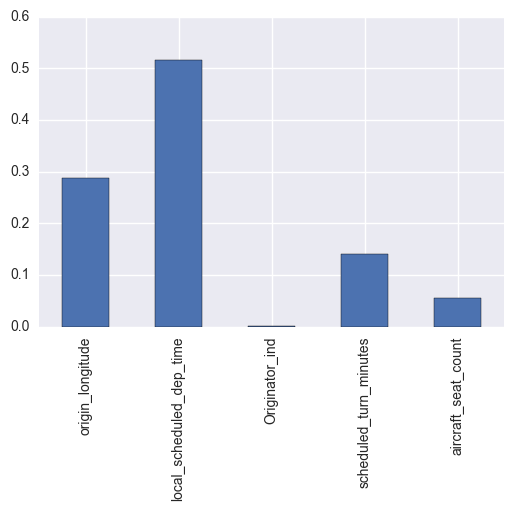

In [86]:
importances =  pd.Series(clf.feature_importances_, index = ['origin_longitude', 'local_scheduled_dep_time',
                                                              'Originator_ind','scheduled_turn_minutes',
                                                              'aircraft_seat_count'] )

ax = importances.plot(kind = 'bar')

This model shows very similar results with the main difference being that the longitude of the origin being more important than before.  This makes sense, since longitude essentially measures the East-West location of the station, this could be an important determining factor in the model that deals with departure time.

Wall time: 1.13 s


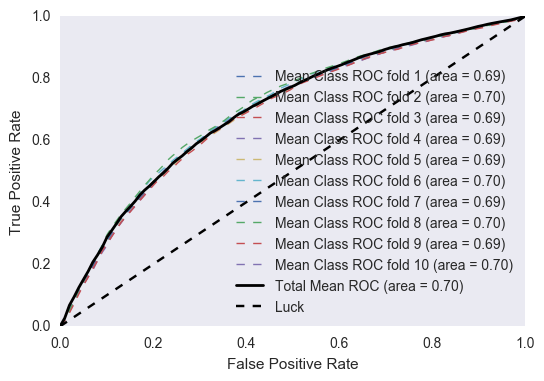

In [87]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split

X2 = X[['origin_longitude', 'local_scheduled_dep_time','Originator_ind','scheduled_turn_minutes','aircraft_seat_count']]

scl = StandardScaler() # import the standardscaler
XScl2 = scl.fit_transform(X2)

X_train, X_test, y_train, y_test = train_test_split(XScl2, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = DecisionTreeClassifier()

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

As far as the models in this classification task go, we get a very similar looking ROC curve.

<a id="T2Forest"></a>
<a href="#top">Back to Top</a>


### Random Forest Classifier

In [33]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables



idx = np.random.choice(np.arange(len(XScl)), 1000, replace=False)
x_sample = XScl[idx]
y_sample = Y[idx]

cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'n_estimators': [2, 4, 6, 8, 10,16, 32, 64, 128, 256, 512], 
                     'max_depth': [2, 4, 6, 8, 10, 16, 32, 64, 128, 256, 512]}
                    ]

scores = ['accuracy','precision','recall',]
                    
for score in scores:
    clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(x_sample,y_sample)
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'max_depth': 128, 'n_estimators': 512}
the best parameters solving for precision  are:  {'max_depth': 128, 'n_estimators': 128}
the best parameters solving for recall  are:  {'max_depth': 16, 'n_estimators': 128}
CPU times: user 23min 58s, sys: 1min 28s, total: 25min 26s
Wall time: 35min 29s


Grid search reveals that the highest accuracy should be provided by a maximum depth of 128 with 512 trees.  Our model will use these parameters to run and classify for On-time departure.

In [30]:
X.shape

(111055, 43)

In [34]:
%%time

from sklearn.ensemble import RandomForestClassifier

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)


clf=RandomForestClassifier(max_depth=128, n_estimators=512, n_jobs=-1)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train], Y[train])
    yhat[test] = clf.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)
print ('Random Forest Classifier', total_accuracy)

total_accuracy_11 = mt.accuracy_score(Y,yhat)
conf_matrix_11 = mt.confusion_matrix(Y,yhat)

precision_11 = conf_matrix_11[1,1] / (conf_matrix_11[1,1]+ conf_matrix_11[0,1])
recall_11 = conf_matrix_11[1,1] / (conf_matrix_11[1,1]+ conf_matrix_11[1,0])
f_measure_11 = (2* conf_matrix_11[1,1]) / ((2* conf_matrix_11[1,1])+ conf_matrix_11[1,0] + conf_matrix_11[0,1])

print('-------------------------------')
print('Random Forest Output')
print( total_accuracy_11)
print(conf_matrix_11)
print('Precision: ',precision_11, 'Recall: ',recall_11, 'F-measure: ', f_measure_11)



Random Forest Classifier 0.727504389717
-------------------------------
Random Forest Output
0.727504389717
[[12574 22073]
 [ 8189 68219]]
Precision:  0.755537589155 Recall:  0.892825358601 F-measure:  0.818464307139
CPU times: user 32min 4s, sys: 1min 23s, total: 33min 28s
Wall time: 21min


Random forests again delivers an accuracy above what we experienced via other methods so far.  Based on the parameters suggested through the grid search, we found an 72.7% accuracy for the model with more than 89% recall.  We can see that it is correctly classifying some of the late departures.



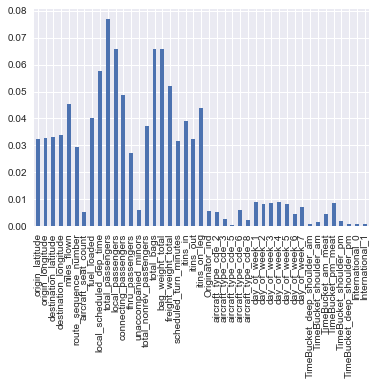

In [35]:
#Show the feature importances

importances =  pd.Series(clf.feature_importances_, index = list([np.array(X.columns.values)]))

ax = importances.plot(kind = 'bar')


Reviewing the importance of the features, again the local scheduled departure time plays a key role in predicting on time departure.  The quantities of what is going on the plane - in the shape of passengers and freight - also show a key role.  Fuel loading also shows a role in the ability to depart on time.  It might be inferred that as a whole, the time required to turn a plane from it's arrival to next departure is a factor in delaying a flight's departure.  

There is also an effect associated with the origin and destination location (in the form of latitude and longitude) that are less than the direct effects of the features for departure time and the passenger and freight load of the plane.  Distance of the planned flight also plays a role in predicting the on-time departure.

A number of features show a much smaller significance in the results - namely the day of the week and the time buckets that were created for deplarture time.  Not surprisingly, the AM and PM "Meat" segments do show some difference from the peripheral time periods.

CPU times: user 23min 7s, sys: 45 s, total: 23min 52s
Wall time: 13min 17s


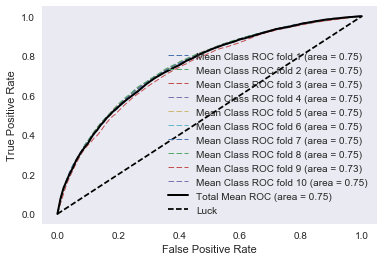

In [37]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp


X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = RandomForestClassifier(max_depth=128, n_estimators=512, n_jobs=-1)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

The ROC curve for Random Forests reaches a True Positive Rate of 80% for a False Positive Rate just above 40%.  The decision tree for this task provided a much higher False Positive Rate to reach the same point for True Positives.

<a id="T2NB"></a>
<a href="#top">Back to Top</a>

### Naive Bayes Classifier

In [99]:
%%time

# gridsearch

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import BernoulliNB


cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'alpha': [0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 3.5], 'fit_prior': ['True']},
                    {'alpha': [0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 3.5], 'fit_prior': ['False']}]

scores = ['accuracy','precision','recall',]
                    
for score in scores:
    clf = GridSearchCV(BernoulliNB(alpha = 1.0, fit_prior = 'True'), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(XScl[train],Y[train])
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'fit_prior': 'True', 'alpha': 2.0}
the best parameters solving for precision  are:  {'fit_prior': 'True', 'alpha': 2.0}
the best parameters solving for recall  are:  {'fit_prior': 'True', 'alpha': 2.0}
Wall time: 1min 27s


In [95]:
%%time

# looking at parameters solved for with NB

from sklearn.naive_bayes import BernoulliNB # doing Bernoulli because of Binary classification
from sklearn.model_selection import ShuffleSplit

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = BernoulliNB(alpha = 2.0)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)


total_accuracy_12 = mt.accuracy_score(Y,yhat)
conf_matrix_12 = mt.confusion_matrix(Y,yhat)

precision_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[0,1])
recall_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[1,0])
f_measure_12 = (2* conf_matrix_12[1,1]) / ((2* conf_matrix_12[1,1])+ conf_matrix_12[1,0] + conf_matrix_12[0,1])

print('-------------------------------')
print('Naive Bayes Output')
print( total_accuracy_12)
print(conf_matrix_12)
print('Precision: ',precision_12, 'Recall: ',recall_12, 'F-measure: ', f_measure_12)

-------------------------------
Naive Bayes Output
0.660204403224
[[19423 15224]
 [22512 53896]]
Precision:  0.77974537037 Recall:  0.705371165323 F-measure:  0.740695948546
Wall time: 1.65 s


While accuracy dropped, we got a really nice precision in this model and it looks like the model is actually learning, because it is classifying negatives, but only getting them about 50% correct.  That being said, we are actually doing a really good job on the True positive front.  

Wall time: 1.25 s


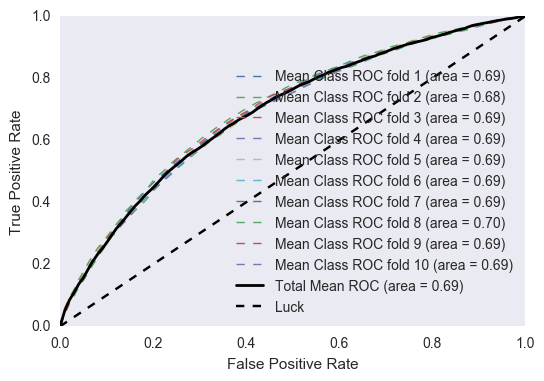

In [96]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = BernoulliNB(alpha = 2.0)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

This model shows a decent ROC curve.  It is interesting that we don't see an improvement in this with the better model.  Again, the ROC curve reveals a nearly 60% false positive rate required to reach an 80% True Positive rate.

<a id="T2Boost"></a>
<a href="#top">Back to Top</a>

### Adaboost Classifier

In [100]:
%%time

#Grid Search on Adaboost



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

scl = StandardScaler() # import the standardscaler
XScl = scl.fit_transform(X) # scale the x-variables


idx = np.random.choice(np.arange(len(XScl)), 1000, replace=False)
x_sample = XScl[idx]
y_sample = Y[idx]

cv = 10 # the model does stratified k-fold by default

tuned_parameters = [{'n_estimators': [2, 4, 6, 8, 16, 32, 64, 128, 256, 512],
                    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 2, 10]}
                    ]

scores = ['accuracy','precision','recall',]
                    
for score in scores:
    clf = GridSearchCV(AdaBoostClassifier(), param_grid = tuned_parameters, cv= cv,
                       scoring= 'accuracy')
    clf.fit(x_sample,y_sample)
    
    print('the best parameters solving for', score,' are: ', clf.best_params_)

the best parameters solving for accuracy  are:  {'learning_rate': 1, 'n_estimators': 16}
the best parameters solving for precision  are:  {'learning_rate': 1, 'n_estimators': 16}
the best parameters solving for recall  are:  {'learning_rate': 1, 'n_estimators': 16}
Wall time: 7min 20s


In [101]:
%%time

from sklearn.ensemble import AdaBoostClassifier

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [
     ('CLF',AdaBoostClassifier(n_estimators=16, learning_rate=1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    clf_pipe.fit(XScl[train],Y[train])
    yhat[test] = clf_pipe.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)
print ('Ada Boost Classifier', total_accuracy)

total_accuracy_12 = mt.accuracy_score(Y,yhat)
conf_matrix_12 = mt.confusion_matrix(Y,yhat)

precision_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[0,1])
recall_12 = conf_matrix_12[1,1] / (conf_matrix_12[1,1]+ conf_matrix_12[1,0])
f_measure_12 = (2* conf_matrix_12[1,1]) / ((2* conf_matrix_12[1,1])+ conf_matrix_12[1,0] + conf_matrix_12[0,1])

print('-------------------------------')
print('AdaBoost Output')
print( total_accuracy_12)
print(conf_matrix_12)
print('Precision: ',precision_12, 'Recall: ',recall_12, 'F-measure: ', f_measure_12)

Ada Boost Classifier 0.705155103327
-------------------------------
AdaBoost Output
0.705155103327
[[ 9803 24844]
 [ 7900 68508]]
Precision:  0.733867512212 Recall:  0.896607685059 F-measure:  0.807115928369
Wall time: 23.2 s


Our precision is still lower here.  It is definitely reassuring to see that the algorithm is classifying negatives though.

Wall time: 18.4 s


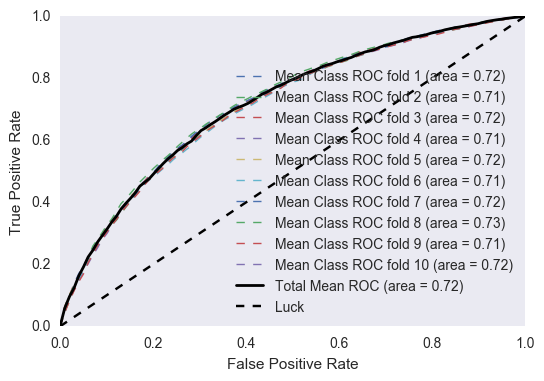

In [102]:
%%time

# Source: Dr.Eric Larson's Machine learning class: https://github.com/eclarson/MachineLearningNotebooks/blob/master/09.%20Evaluation.ipynb
#            and sklearn metrics documentation

from sklearn.model_selection import StratifiedKFold, train_test_split


X_train, X_test, y_train, y_test = train_test_split(XScl, Y, test_size=0.20, random_state=1)

K = 10

kfold = StratifiedKFold(n_splits=K, random_state=1).split(X_train, y_train)

clf = AdaBoostClassifier(n_estimators=16, learning_rate=1.0)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    probas = clf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y_train[train])
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y_train[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= K
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='k',label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()

It looks like the ROC curve here is close to the same as the random forest.  However, it feels like this model may not be as good as the Naive Bayes.

It appears that a slightly higher than 50% False Positive Rate is required to reach an 80% True Positive Rate.

<a id="T2comp"></a>
<a href="#top">Back to Top</a>

### Model comparison with confidence intervals

In [38]:
# First, let's make a summary of the accuracies

print('The precision of the Naive Bayes (Bernoulli) was 0.77974537037 ')
print('------------------------------------------------------------------')

print('The precision of the Logistic Regression Model was 0.734926040338')
print('The precision of the KNN algorithm was 0.744223873863')
print('The precision of the Decision Tree with full attribute list was 0.745799213988')


print('The precision of the Random Forest was 0.755537589155')
print('The precision of the Adaboost was 0.733867512212')

# in this case we are most interested in seeing if the naive bayes provided a statistically significant improvement over the Decision tree and KNN

# calc the errors
knn_err = 1-0.744223873863
dt_err = 1-0.745799213988
nb_err = 1-0.77974537037
rf_err = 1-0.755537589155
ab_err = 1-0.733867512212
lr_err = 1-0.734926040338

n = 111055

# calc the variances
knn_var = (knn_err*(1-knn_err))/n
dt_var = (dt_err*(1-dt_err))/n
nb_var = (nb_err*(1-nb_err))/n
rf_var = (rf_err*(1-rf_err))/n
ab_var = (ab_err*(1-ab_err))/n
lr_var = (lr_err*(1-lr_err))/n




# calc the t-statistic
t = 1.96 # have enough observations that we are pretty much at normal (z)

nb_versus_dt_upper = (nb_err- dt_err) + (1.96*(np.sqrt(dt_var+nb_err)))
nb_versus_dt_lower = (nb_err- dt_err) - (1.96*(np.sqrt(dt_var+nb_err)))

nb_versus_knn_upper = (nb_err- knn_err) + (1.96*(np.sqrt(knn_var+nb_err)))
nb_versus_knn_lower = (nb_err- knn_err) - (1.96*(np.sqrt(knn_var+nb_err)))

nb_versus_rf_upper = (nb_err- rf_err) + (1.96*(np.sqrt(rf_var+nb_err)))
nb_versus_rf_lower = (nb_err- rf_err) - (1.96*(np.sqrt(rf_var+nb_err)))

nb_versus_ab_upper = (nb_err- ab_err) + (1.96*(np.sqrt(ab_var+nb_err)))
nb_versus_ab_lower = (nb_err- ab_err) - (1.96*(np.sqrt(ab_var+nb_err)))

nb_versus_lr_upper = (nb_err- lr_err) + (1.96*(np.sqrt(lr_var+nb_err)))
nb_versus_lr_lower = (nb_err- lr_err) - (1.96*(np.sqrt(lr_var+nb_err)))

print('------------------------------------------------------------------')
print('95% Confidence Interval Results')
print('------------------------------------------------------------------')

print('naive bayes versus KNN CI: ',nb_versus_knn_lower, ':', nb_versus_knn_upper )
print('naive bayes versus Decision Tree CI: ',nb_versus_dt_lower, ':', nb_versus_dt_upper )
print('naive bayes versus Random Forest CI: ',nb_versus_rf_lower, ':', nb_versus_rf_upper )
print('naive bayes versus Ada Boost CI: ',nb_versus_ab_lower, ':', nb_versus_ab_upper )
print('naive bayes versus Logistic Regression CI: ',nb_versus_lr_lower, ':', nb_versus_lr_upper )

The precision of the Naive Bayes (Bernoulli) was 0.77974537037 
------------------------------------------------------------------
The precision of the Logistic Regression Model was 0.734926040338
The precision of the KNN algorithm was 0.744223873863
The precision of the Decision Tree with full attribute list was 0.745799213988
The precision of the Random Forest was 0.755537589155
The precision of the Adaboost was 0.733867512212
------------------------------------------------------------------
95% Confidence Interval Results
------------------------------------------------------------------
naive bayes versus KNN CI:  -0.955378425552 : 0.884335432538
naive bayes versus Decision Tree CI:  -0.953803070912 : 0.885910758148
naive bayes versus Random Forest CI:  -0.944064603945 : 0.895649041515
naive bayes versus Ada Boost CI:  -0.965734880301 : 0.873979163985
naive bayes versus Logistic Regression CI:  -0.964676342844 : 0.87503768278


All of these ranges contain zero.  Therefore, we fail to reject the null hypothesis that the differences in the mean error rates are zero.

<a id="T2Summary"></a>
<a href="#top">Back to Top</a>
### Classification Task 2 - Conclusions

For the classification task of D0, we tried all of the same classification tasks as had been tried for the OTP classification.  Once again, we saw that the Naive Bayes has the best precision.  However, it appears that this model does not provide a statistically significantly different result from the previous model.  With that being said, abiding by Ocam's razor, we would still select the Naive Bayes for this approach.

<a id="FurtherResearch"></a>
<a href="#top">Back to Top</a>
### Further Research Areas - Both Classification Tasks

Models for both of the classification tasks, DOT On Time (Arrival) Performance, and D0 departure time performance revealed some of the weaknesses of the model types given an unbalanced classification within the data set.  Adoption of appropriate algorithms provided higher levels of Accurcy and Precision for the results in both tasks.

The predictability of DOT On Time (Arrival) performance showed to be much higher than the best algorithm provided for D0 departure performance.  This confirmed one of the researcher's existing beliefs in the travel process - that given the emphasis on arriving on time - there could be adjustments made after departure to attempt to meet on-time arrival. Likewise, there could exist a practice of "padding" flight times between airports with frequent delay problems to reduce the occurrence of "Late" flights.  It could also be an example of Goodhart's Law - where "once a measure becomes a target, it ceases to be a good measure."  On the positive side, meeting an expected arrival time is an important expectation set with travelers, with more dependencies set against it then the departure time.

Improvement of the model for the D0 Departure time might be accomplished through further research on potential causes for flights.  Given the data set was taken from a month with typically mild weather across the United States, most types of weather that cripples airports has been excluded.  Extension of the models with additional variables found through investigation and interview with personnel throughout the organization might yield a stronger result of understanding On Time Departure and Arrival.

Some measures of congestion for an airport might provide appropriate indication of an airport under stress.  This could resemble a large number of flights per available gate for the airline, or a high level of traffic in the airport for all airlines.  

With greater understanding of the features that affect on time departure and arrival, changes could be recommended to Operations areas that might improve performance for both.  This could affect the density of the schedule at certain times of days at specific airports. 

Some amount of random noise is expected in this type of data - which might account for the delays caused by localized weather or mechanical problems.  Further investigation might start with examining the bias within incorrectly classified observations - and whether these can be correlated to occur at greater frequency within the dataset to a specific level of categorical feature or value ranges for continous variables.